<a href="https://colab.research.google.com/github/ronan777/HydroProc/blob/main/DetectSave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q condacolab
import condacolab
condacolab.install()
!conda install obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
from obspy import read_inventory
from obspy import read
import obspy.core.stream as st
import obspy.signal.cross_correlation as cc
import obspy.signal.filter as flt
import obspy.signal.trigger as trg
import obspy.signal.freqattributes as frq
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import math
import gc


✨🍰✨ Everything looks OK!
Channels:
 - conda-forge
Platform: linux-64
Solving environment: / - \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



16800.0
(-1.9386950000000207, 0.49834692578129824) (-1.3987489999999372, -1.4550044492706635)
(-0.31888584116312174, -1.1124813333333192, -0.011333333333333334) (0.0, 0.0, 0.0) (0.49834692578129824, -1.9386950000000207, -0.008) (-1.4550044492706635, -1.3987489999999372, -0.026)


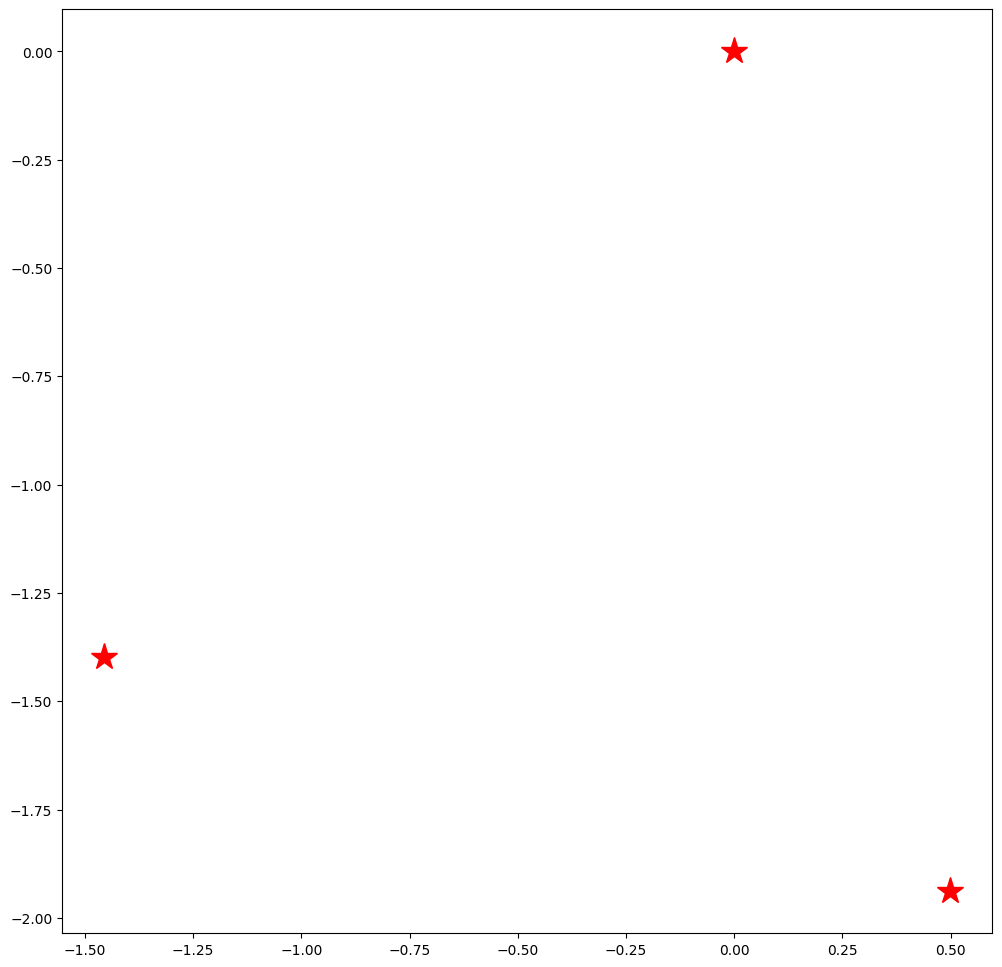

In [3]:
##
# Parameter initialization
#
#timestring="2024-02-21 01:00:00"
#timestring="2024-02-20 23:00:00"
#timestring="2024-02-20 21:00:00"
#timestring="2024-02-20 19:00:00"
#timestring="2024-02-20 17:00:00"
#timestring="2024-02-20 15:00:00"
#timestring="2024-02-20 14:00:00"
#timestring="2024-02-20 12:00:00"
#timestring="2024-02-20 10:00:00"
#timestring="2024-02-20 09:30:00"
#timestring="2024-02-20 09:00:00"
#timestring="2024-02-20 07:00:00"
#timestring="2024-02-20 07:30:00"
#timestring="2024-02-20 05:30:00"
#timestring="2024-02-20 05:10:00"
#timestring="2024-02-20 03:00:00"
#timestring="2024-02-20 03:45:00"
#timestring="2024-02-20 01:00:00"
#timestring="2024-02-20 00:12:00"
#timestring="2024-02-20 02:00:00"
#timestring="2024-02-20 02:20:00"
#timestring="2024-02-20 02:22:00"
#timestring="2024-02-20 02:30:00"
#timestring="2024-02-19 23:00:00"
#timestring="2024-02-19 21:00:00"
timestring="2024-02-19 22:40:00"
#timestring="2024-02-19 19:00:00"
#timestring="2024-02-19 18:20:00"
timestring0="2024-02-19 18:00:00"
starttime=UTCDateTime(timestring)
starttime0=UTCDateTime(timestring0)
firsttime=starttime-starttime0
print(firsttime)
#Interval = 36000
#Interval = 300
#Interval = 3600
#Interval = 7200
Interval = 1800
#Interval = 9600
#Interval = 1200
#Interval = 960
#Interval = 10
path="/content/drive/MyDrive/MSEED/"
hvel = 1.48
depth = -0.750
coord_correction = False
#
#
#
# Map of the triplet
#
#
#
h11s1=(18.50827,166.700272)
h11s2=(18.49082,166.705002)
h11s3=(18.49568,166.686462)
kmdeg=111.1
x2=(kmdeg*(h11s2[0]-h11s1[0]),kmdeg*(h11s2[1]-h11s1[1])*math.cos(np.pi*18.5/180))
x3=(kmdeg*(h11s3[0]-h11s1[0]),kmdeg*(h11s3[1]-h11s1[1])*math.cos(np.pi*18.5/180))
print(x2,x3)
S1_i = (0., 0., 0.)
S2_i = (x2[1], x2[0], -0.008)
S3_i = (x3[1], x3[0], -0.026)
S1 = S1_i
S2 = S2_i
S3 = S3_i
S0 = ((S1[0]+S2[0]+S3[0])/3, (S1[1]+S2[1]+S3[1])/3, (S1[2]+S2[2]+S3[2])/3)
print(S0, S1,S2,S3)
#Delta_S = np.load(path+"Delta_S"+"_"+timestring+"_"+str(Interval)+".npy")

fig, ax = plt.subplots(figsize=(12, 12), )
plt.plot([0],[0],'r*', markersize=20)
plt.plot([x2[1]],[x2[0]],'r*', markersize=20)
plt.plot([x3[1]],[x3[0]],'r*', markersize=20)
plt.plot([0],[0],'r-')
if (coord_correction):
  Delta_S = np.load(path+"Delta_S"+"_"+timestring+"_"+str(Interval)+".npy")
# plt.plot([Delta_S[1]]+Delta_S[0],[Delta_S[2]]+Delta_S[3],'r.', markersize=20)
  plt.plot([x3[1]]+Delta_S[6],[x3[0]]+Delta_S[7],'r.', markersize=20)
  plt.plot([x2[1]]+Delta_S[3],[x2[0]]+Delta_S[4],'r.', markersize=20)
  plt.plot(Delta_S[0],Delta_S[1],'r.', markersize=20)
  plt.plot([x3[1]]+Delta_S[6],[x3[0]]+Delta_S[7]+Delta_S[8],'ko', markersize=5)
  plt.plot([x2[1]]+Delta_S[3],[x2[0]]+Delta_S[4]+Delta_S[5],'ko', markersize=5)
  plt.plot(Delta_S[0],Delta_S[1]+Delta_S[2],'ko', markersize=5)
  ax = plt.figure(figsize=(24, 12)).add_subplot(projection='3d')
  t1x=(S1[0],S2[0],S3[0], S1[0])
  t1y=(S1[1],S2[1],S3[1], S1[1])
  t1z=(S1[2],S2[2],S3[2], S1[2])
  ax.plot(t1x,t1y,t1z,'r-')
  t2x=(S1[0]+Delta_S[0],S2[0]+Delta_S[3],S3[0]+Delta_S[6], S1[0]+Delta_S[0])
  t2y=(S1[1]+Delta_S[1],S2[1]+Delta_S[4],S3[1]+Delta_S[7], S1[1]+Delta_S[1])
  t2z=(S1[2]+Delta_S[2],S2[2]+Delta_S[5],S3[2]+Delta_S[8], S1[2]+Delta_S[2])
  ax.plot(t2x,t2y,t2z,'k-')
  l1x = (S1[0],S1[0]+Delta_S[0])
  l1y = (S1[1],S1[1]+Delta_S[1])
  l1z = (0.,0.)
  ax.plot(l1x,l1y,l1z,'r--')
  l1x = (S2[0],S2[0]+Delta_S[3])
  l1y = (S2[1],S2[1]+Delta_S[4])
  l1z = (0.,0.)
  ax.plot(l1x,l1y,l1z,'r--')
  l1x = (S3[0],S3[0]+Delta_S[6])
  l1y = (S3[1],S3[1]+Delta_S[7])
  l1z = (0.,0.)
  ax.plot(l1x,l1y,l1z,'r--')
  l1x = (S1[0]+Delta_S[0],S1[0]+Delta_S[0])
  l1y = (S1[1]+Delta_S[1],S1[1]+Delta_S[1])
  l1z = (0.,Delta_S[2])
  ax.plot(l1x,l1y,l1z,'k--')
  l1x = (S2[0]+Delta_S[3],S2[0]+Delta_S[3])
  l1y = (S2[1]+Delta_S[4],S2[1]+Delta_S[4])
  l1z = (0.,Delta_S[5])
  ax.plot(l1x,l1y,l1z,'k--')
  l1x = (S3[0]+Delta_S[6],S3[0]+Delta_S[6])
  l1y = (S3[1]+Delta_S[7],S3[1]+Delta_S[7])
  l1z = (0.,Delta_S[8])
  ax.plot(l1x,l1y,l1z,'k--')
  siz = ([200])
  ax.scatter(S1[0], S1[1], S1[2], c='r', marker='*', s=siz)
  ax.scatter(S2[0], S2[1], S2[2], c='r', marker='*', s=siz)
  ax.scatter(S3[0], S3[1], S3[2], c='r', marker='*', s=siz)
  ax.scatter(Delta_S[0], Delta_S[1], 0.,c='r',marker='.', s=siz)
  ax.scatter(S2[0]+Delta_S[3], S2[1]+Delta_S[4], 0.,c='r',marker='.', s=siz)
  ax.scatter(S3[0]+Delta_S[6], S3[1]+Delta_S[7], 0.,c='r',marker='.', s=siz)
  ax.scatter(Delta_S[0], Delta_S[1],Delta_S[2],c='k',marker='.', s=siz)
  ax.scatter(S2[0]+Delta_S[3], S2[1]+Delta_S[4],Delta_S[5],c='k',marker='.', s=siz)
  ax.scatter(S3[0]+Delta_S[6], S3[1]+Delta_S[7],Delta_S[8],c='k',marker='.', s=siz)
  elev = 40.
  azim = 120.
  roll = 180
  ax.view_init(elev, azim, roll)
#plt.xticks(fontsize=16)
#plt.yticks(fontsize=16)
  ax.set_xlabel("Longitude", size = 16)
  ax.set_ylabel("Latitude", size = 16)
  ax.set_zlabel("Depth", size = 16)
  ticks = np.arange(0.,2,0.5)
#ax.set_xticks(ticks)
#ax.set_yticks(size = 20)
  ax.set_zticks(ticks)
  ax.set_zlim(0, 2.)
#plt.ylabel('Latitude', size=20)
#plt.xlabel('Longitude', size=20)
#plt.zlabel('Depth', size=20)
#plt.annotate('H11S1',xy=(0,0),xytext=(0,0.1),fontsize=20)
#plt.annotate('H11S2',xy=(x2[1],x2[0]),xytext=(x2[1],x2[0]+0.1),fontsize=20)
#plt.annotate('H11S3',xy=(x3[1],x3[0]),xytext=(x3[1],x3[0]+0.1),fontsize=20)
  plt.xlim([-2,1.])
  plt.ylim([-2.5,0.5])
#plt.zlim([0.,0.5])
  plt.show()
  S1 = ([Delta_S[1]]+Delta_S[0],[Delta_S[2]]+Delta_S[3])
  S2 = ([x3[1]]+Delta_S[6],[x3[0]]+Delta_S[7])
  S3 = ([x2[1]]+Delta_S[3],[x2[0]]+Delta_S[4])

In [ ]:
#
#
# Define functions to be used by several modules.
#
def Norm(A):
  return math.sqrt(A[0]*A[0]+A[1]*A[1]+A[2]*A[2])

def Diff(A,B):
  return (A[0]-B[0], A[1]-B[1],A[2]-B[2])

def Delays12_13 (S1,S2,S3,x,hvel):
#  print(S1,S2,S3,x)
  dt12 = (Norm(Diff(S2,x))-Norm(Diff(S1,x)))/hvel
  dt31 = (Norm(Diff(S1,x))-Norm(Diff(S3,x)))/hvel
  return dt12,dt31
#
# Theoretical amplitude ratios given current point and
#  three hydrophone coordinates
#
def AmpRatios (S1,S2,S3,x):

  r12 = Norm(Diff(S2,x))/Norm(Diff(S1,x))
  r31 = Norm(Diff(S1,x))/Norm(Diff(S3,x))
  return r12,r31

def Dist(d12,d31,a12,a31):
  D1 = d12*hvel/(a12-1.)
  D2 = D1+hvel*d12
  D3 = D1+hvel*d31
  return D1,D2,D3
#
#
#
def CompDt(d, vert, wvel, S1, S2, S3):
  '''
	Computes two time differences given two input vectors giving the triad geometry in East-North coordinate system.
	The vectors are (sta2-sta1) and (st1-sta3), where sta1, sta2, and sta3 are the hydrophone elements
	of the triad.
	The time differences are the difference in propagation time of an acoustic wave in the water
  given a velocity of wvel km/s. This time difference is computed using the dot product of the diretion of
  propagation with each vector, divided by the velocity. The direction of the plane wave is given by the azimuth d,
  and the vertical angle vert.

                   d12
	 sta1 	O----------------->O sta2
	        ^
	    d31 |
	        |
		      |
	sta3    O

	For instance if sta2 is one kilometer to the east of sta1, and sta3 is 0.5 kilometers to the south of sta1,
	the first vector is (1.,0), and the second vector is (0.,0.5)

	Input:
		d12: first vector (tuple with two floats)
		d31: second vector (tuple with two floats)
		d:  direction in radian from East. Counterclockwise is positive.
	Output:
		dt1, dt2: tuple containing the two time differences
  '''
#
#
#
  vertrad = np.pi*float(vert)/180.
  dot = (S2[0]-S1[0])*math.cos(d)*math.cos(vertrad)+(S2[1]-S1[1])*math.sin(d)*math.cos(vertrad)+(S2[2]-S1[2])*math.sin(vertrad)
  dt12 = dot/wvel
  dot = (S1[0]-S3[0])*math.cos(d)*math.cos(vertrad)+(S1[1]-S3[1])*math.sin(d)*math.cos(vertrad)+(S1[2]-S3[2])*math.sin(vertrad)
  dt31 = dot/wvel
  return dt12, dt31

def CompDtNear(X, wvel, S1, S2, S3):
  '''
	Input:
		X:    Position of source
    wvel: Water velocity
		S1, S2, S3: Hydrophone positions
	Output:
		dt1, dt2, dt3: tuple containing the three time differences
  '''
#
#
#
  dt1 = Norm(Diff(S1,X))/wvel
  dt2 = Norm(Diff(S2,X))/wvel
  dt3 = Norm(Diff(S3,X))/wvel

  return dt1, dt2, dt3
#
#
#
#
def CompDirection (S1, S2, S3, dt, prec):


  mindiff = 9999999999999999999999.
  OptDirection = 0.
  wvel = 1.48
  found = False
  nvert = int(90/prec)
  naz = int(360/prec)
#
#

  for vert in range (0,nvert,1):
    vertang = vert*90./nvert
    for i in range (naz):
      theta = 2.*np.pi*float(i)/naz
      dt1,dt2 = CompDt(theta,vertang, wvel, S1, S2, S3)
      dt3 = -dt2-dt1
      diff = math.sqrt((dt1-dt[0])*(dt1-dt[0])+(dt2-dt[1])*(dt2-dt[1])+(dt3-dt[2])*(dt3-dt[2]))
      if (diff < mindiff):
        mindiff = diff
        OptDirection = theta
        OptVelocity = wvel
        Optang = vertang
        found = True
#
#
  return OptDirection, OptVelocity, Optang, found
#
#
#
def CompVelAz(delay12,delay31,delay23, S1, S2, S3, prec):
  k = 0
  az = np.empty(0)
  vel = np.empty(0)
  #
  #
  nk = len(delay12)
  #
  k = 0
  while k < nk :
    if(not k%20):
      print(k)
    std = (delay12[k] + delay31[k] + delay23[k])/3.
    dt =  (delay12[k], delay31[k], delay23[k], std, std, std)
    OptDirection, OptVelocity, Optang, found  = CompDirection(S1,S2,S3, dt, prec)
  #
  # Direction computed is the azimuth of the propagating plane wave
  # change to backazimuth within [0-2*pi]
  #

    if (OptDirection < 0) :
      OptDirection += 2*np.pi
    elif (OptDirection >= 2.*np.pi ):
      OptDirection -= 2*np.pi
    if (found):
      az=np.append(az,OptDirection)
      vel=np.append(vel,Optang)
#      tim = np.append(tim, times[k])
#
#
#
#
#    print(180*OptDirection/np.pi, OptVelocity, Optang)
    k += 1
  return az, vel
#
#
# Find optimum location given delays, amplitude ratios, velocity
#
def MinRes (d12,d31,a12,a31,wdepth,delay_only,amp_only, S1, S2, S3):
  if (delay_only and amp_only):
     exit(1)
  verbose = False
  resmin = 9999999999999999999999999999999.
  if (verbose):
    print(d12, d31, a12, a31)
  x_opt = 0.
  y_opt = 0.
  z_opt = wdepth
#  norm = (Norm(Diff(S2,S1))+Norm(Diff(S3,S1))+Norm(Diff(S3,S2)))/hvel/3
  #
  # Find first point
  #
  N = 0
  ndepths = 10
  nx=400
  xprev = 0
  yprev = 0
  resmap = np.zeros((nx,nx))
  for ix in range(nx) :
    xh = xprev+(ix-nx/2)*0.025
    for iy in range(nx) :
      yh = yprev+(iy-nx/2)*0.025
      for d in range(ndepths) :
        tdepth = wdepth-0.005*ndepths/2.+d*0.005
#        print(xh,yh,tdepth)
#
# Calculate theoretical delays 12 and 13 using straight rays
#
        x = (xh, yh, tdepth)
        dt12,dt31 = Delays12_13 (S1,S2,S3,x,hvel)
        at12, at31 = AmpRatios (S1,S2,S3,x)
#         print(dt12,dt13)
#
#
        if (delay_only):
          res = math.sqrt((d12-dt12)*(d12-dt12)+(d31-dt31)*(d31-dt31))
        elif (amp_only):
          res = math.sqrt((a12-at12)*(a12-at12)+(a31-at31)*(a31-at31))
        else :
          res = math.sqrt((a12-at12)*(a12-at12)+(a31-at31)*(a31-at31)+
           ((d12-dt12)*(d12-dt12)+(d31-dt31)*(d31-dt31)))
        N += 1
#        print(N, res)
        resmap[iy,ix] = res
        if (res < resmin):
#          print(N, res)
          resmin = res
          x_opt = xh
          y_opt = yh
          z_opt = tdepth
#         print(dt12,dt13)
      yh += 0.025
    xh += 0.025
#
#
  return resmin, x_opt, y_opt, z_opt, resmap
#
def MinResInc (d12,d31,a12,a31,xprev,yprev,dprev, ndep,delay_only,amp_only, S1, S2, S3):
  if (delay_only and amp_only):
     exit(1)
  verbose = False
  resmin = 9999999999999999999999999999999.
  if(verbose):
    print("delays",d12,d31)
    print("amp ratios", a12,a31)
  x_opt = 0.
  y_opt = 0.
  z_opt = dprev
  if (verbose):
    print("previous depth",dprev)
#  norm = (Norm(Diff(S2,S1))+Norm(Diff(S3,S1))+Norm(Diff(S3,S2)))/hvel/3
  #
  # Find next minimum in a cube centered on previous print
  #
  N = 0
  xh = xprev
  nx = 40
  ndepth = ndep
  resmap = np.zeros((nx,nx))
  for ix in range(nx) :
    xh = xprev+(ix-nx/2)*0.025
    yh = yprev
    for iy in range(nx) :
      yh = yprev+(iy-nx/2)*0.025
      for d in range(ndepth) :
        tdepth = dprev-0.005*ndepth/2.+d*0.005
#        print(xh,yh,tdepth)
        x = (xh, yh, tdepth)
        dt12,dt31 = Delays12_13 (S1,S2,S3,x,hvel)
        at12, at31 = AmpRatios (S1,S2,S3,x)
#        print(dt12,dt13)
#
        if (delay_only):
          res = math.sqrt((d12-dt12)*(d12-dt12)+(d31-dt31)*(d31-dt31))
        elif (amp_only):
          res = math.sqrt((a12-at12)*(a12-at12)+(a31-at31)*(a31-at31))
        else :
          res = math.sqrt((a12-at12)*(a12-at12)+(a31-at31)*(a31-at31)+
           ((d12-dt12)*(d12-dt12)+(d31-dt31)*(d31-dt31))/norm/norm)
        N += 1
#        print(N, res)
        resmap[iy,ix] = res
        if (res < resmin):
#          print(N, res)
          resmin = res
          dt12_opt = dt12
          dt31_opt = dt31
          at12_opt = at12
          at31_opt = at31
          x_opt = xh
          y_opt = yh
          z_opt = tdepth
#          print(dt12,dt13,at12,at13)
#
#
#
  if (verbose):
    print("T delays",dt12_opt,dt31_opt)
    print("T amp ratios",at12_opt,at31_opt)
  return resmin, x_opt, y_opt, z_opt, resmap



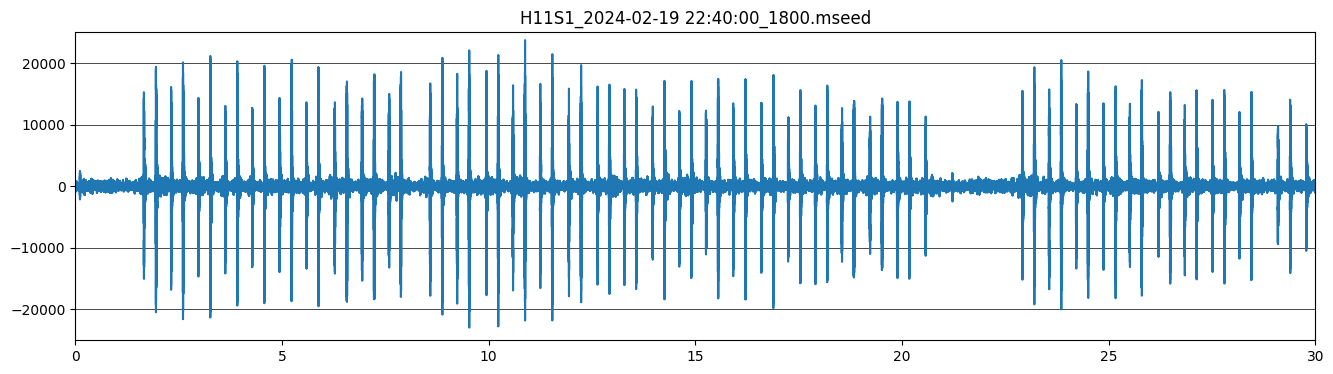

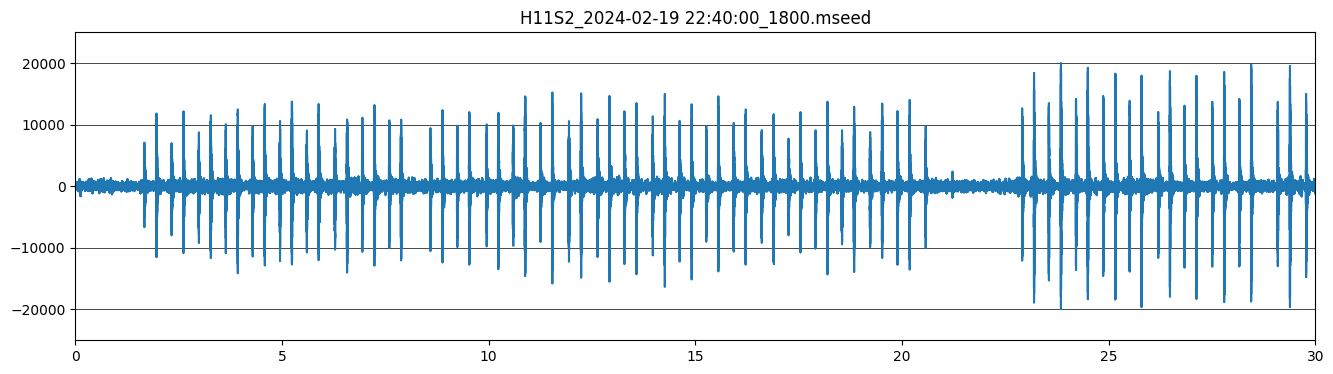

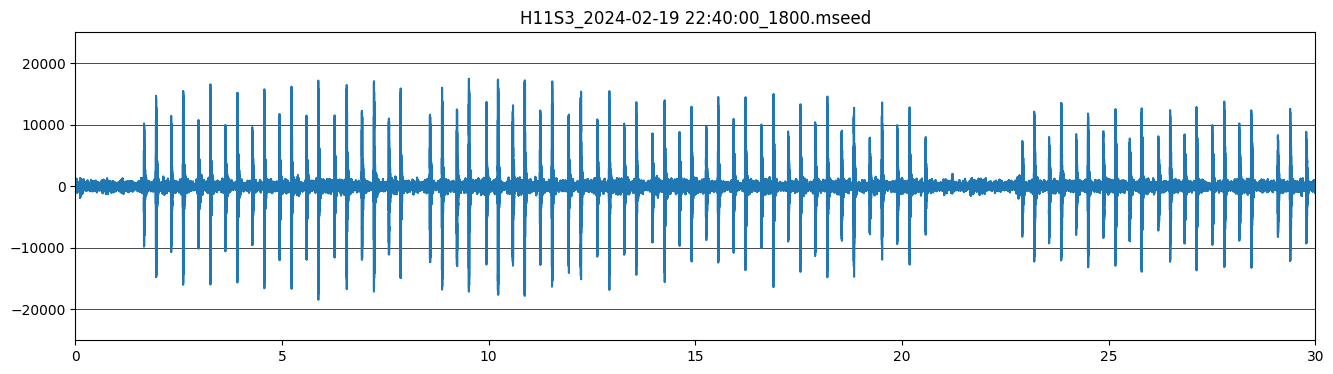

In [ ]:
#
#  Read from disk and plot waveforms - Optional filtering
#
for hyd in ('H11S1', 'H11S2', 'H11S3'):
  mseedfile=hyd+"_"+timestring+"_"+str(Interval)+".mseed"
  st1 = read(path+mseedfile)

  fig, ax = plt.subplots(figsize=(16, 4), )
  ax.hlines([-20000,-10000,0,10000,20000],0,120, color='k', linewidth=0.5)
  ndT = len(st1[0].data)
  tseg=np.empty(ndT)
  nt=0
  dt=250
  while nt < ndT :
    tseg[nt] = nt/250./60.
    nt+=1
  w1 = flt.bandpass(st1.detrend(type='linear')[0].data, 0.1, 125, dt)
  plt.plot(tseg, st1[0].data)
  plt.title(mseedfile)
  plt.xlim(0,30)
  plt.ylim(-25000,25000)
  plt.show()

[1. 1.]
1 Trace(s) in Stream:
IM.H11S2..EDH | 2024-02-19T22:40:00.003000Z - 2024-02-19T23:09:59.999000Z | 250.0 Hz, 450000 samples


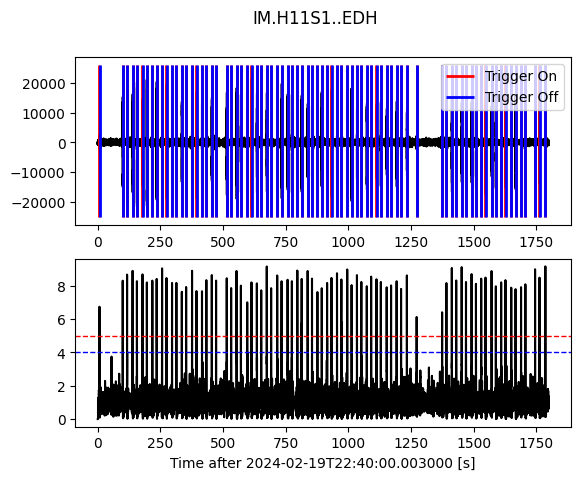

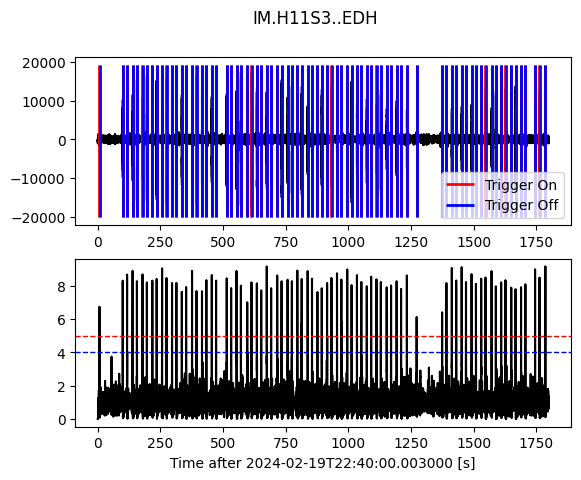

length of envelope: 450000
number of picks env1: 80
number of picks env2: 78
number of picks env3: 79
Time in minutes: 1.6584
central frequencies: 17.28 17.52 17.05 Average: 17.28240974171462
Segment 1 Time step: 250.0 80 segments
Times of pick onsets: 99.504 100.084 99.664
Shift and max: 0.904 [0.48420278] -0.156 [0.58334477]
Time in minutes: 1.9471999999999998
central frequencies: 20.94 21.22 21.04 Average: 21.065255495933613
Segment 2 Time step: 250.0 80 segments
Times of pick onsets: 116.832 117.364 117.008
Shift and max: 0.832 [0.52134355] -0.152 [0.70771981]
Time in minutes: 2.3154
central frequencies: 17.47 17.66 17.43 Average: 17.5189863991708
Segment 3 Time step: 250.0 80 segments
Times of pick onsets: 138.924 139.468 139.076
Shift and max: 0.468 [0.62226145] -0.144 [0.62005355]
Time in minutes: 2.6022000000000003
central frequencies: 21.2 21.66 21.32 Average: 21.395978095989687
Segment 4 Time step: 250.0 80 segments
Times of pick onsets: 156.132 156.612 156.28
Shift and max: 

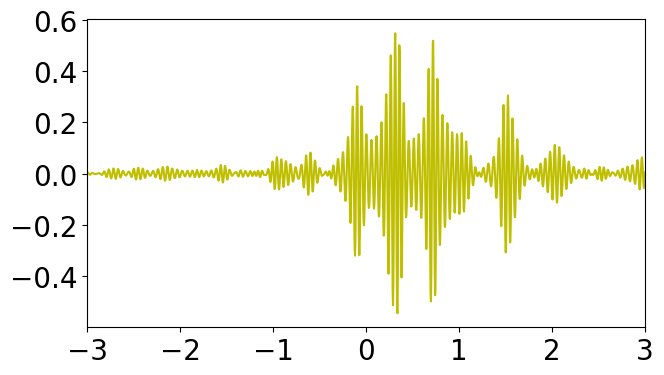

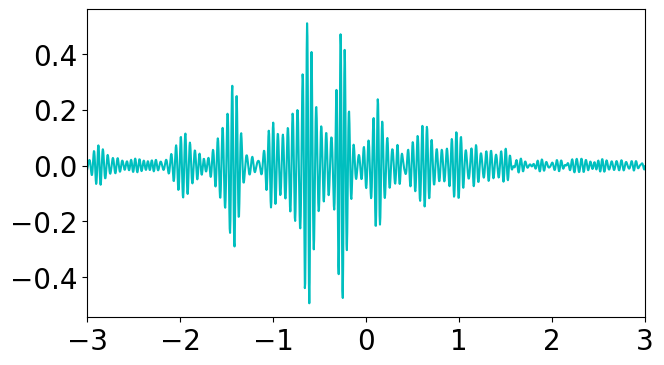

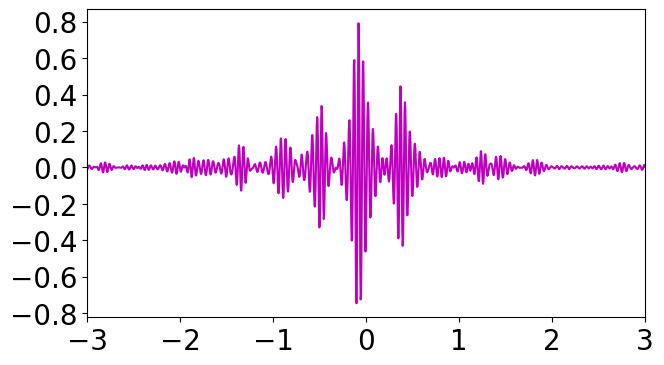

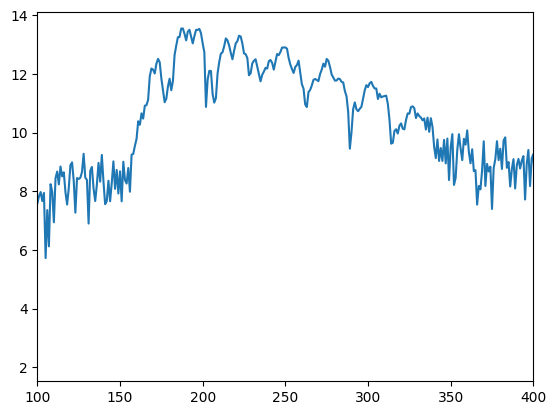

Time in minutes: 4.939333333333334
central frequencies: 17.2 17.28 17.47 Average: 17.31782390213675
Segment 11 Time step: 250.0 80 segments
Times of pick onsets: 296.36 296.728 296.416
Shift and max: 0.704 [0.60636429] -0.072 [0.80116793]
Time in minutes: 5.2282
central frequencies: 21.0 21.19 21.3 Average: 21.164505396398614
Segment 12 Time step: 250.0 80 segments
Times of pick onsets: 313.692 314.06 313.696
Shift and max: 0.696 [0.48180653] -0.06 [0.82222898]
Time in minutes: 5.590599999999999
central frequencies: 17.21 17.28 17.5 Average: 17.329770436836625
Segment 13 Time step: 250.0 80 segments
Times of pick onsets: 335.436 335.812 335.468
Shift and max: 0.68 [0.53950878] -0.052 [0.63220287]
Time in minutes: 5.8762
central frequencies: 20.96 21.3 21.22 Average: 21.15975608905717
Segment 14 Time step: 250.0 80 segments
Times of pick onsets: 352.572 352.888 352.584
Shift and max: 0.676 [0.44811964] -0.04 [0.73091631]
Time in minutes: 6.27
central frequencies: 17.2 17.25 17.51 Averag

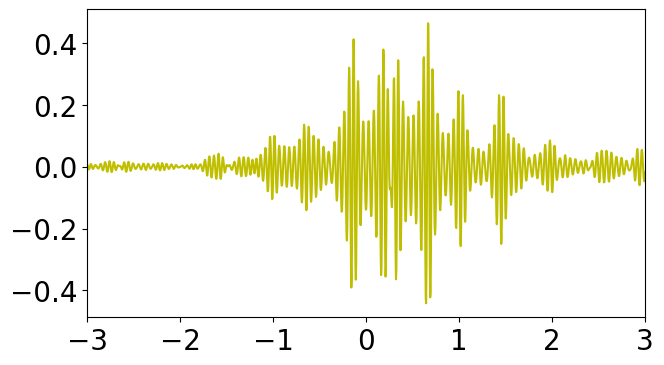

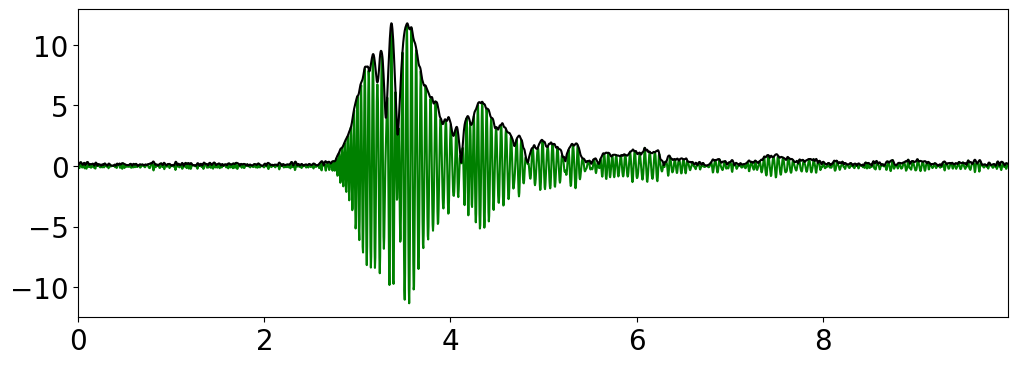

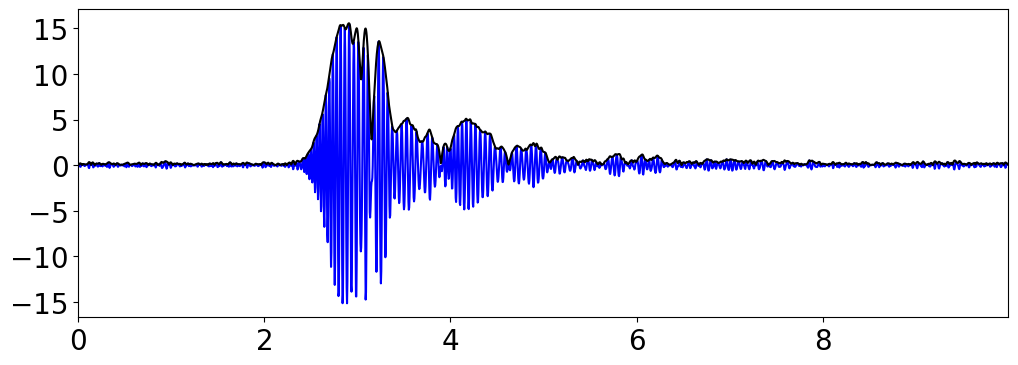

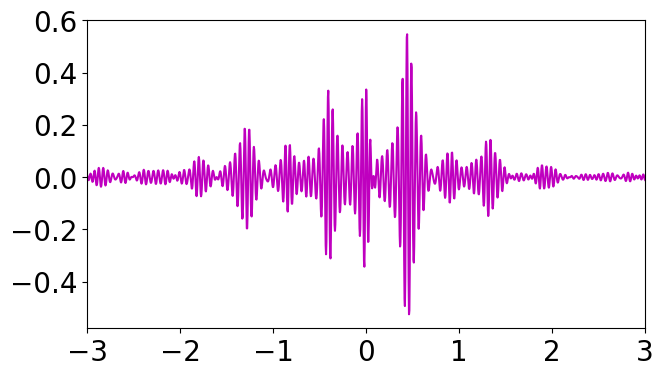

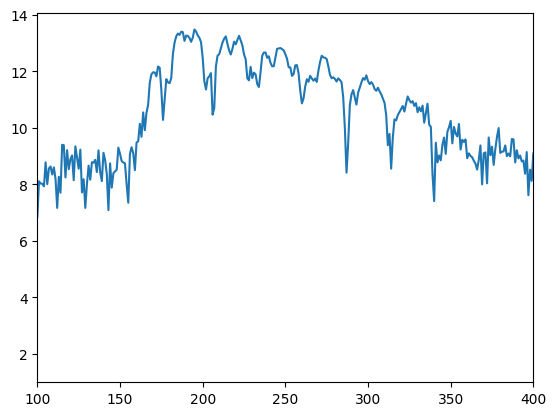

Time in minutes: 8.5788
central frequencies: 17.12 17.24 17.3 Average: 17.22209857493039
Segment 21 Time step: 250.0 80 segments
Times of pick onsets: 514.728 515.048 514.712
Shift and max: 0.276 [0.7722419] 0.032 [0.68547698]
Time in minutes: 8.8706
central frequencies: 20.77 21.04 21.01 Average: 20.942135980387437
Segment 22 Time step: 250.0 80 segments
Times of pick onsets: 532.236 532.54 532.188
Shift and max: 0.26 [0.56615577] 0.04 [0.64951595]
Time in minutes: 9.2302
central frequencies: 17.25 17.24 17.34 Average: 17.275396262472132
Segment 23 Time step: 250.0 80 segments
Times of pick onsets: 553.812 554.088 553.744
Shift and max: 0.248 [0.86645456] 0.052 [0.87667255]
Time in minutes: 9.520666666666667
central frequencies: 21.16 21.34 21.25 Average: 21.251176940664568
Segment 24 Time step: 250.0 80 segments
Times of pick onsets: 571.24 571.512 571.144
Shift and max: 0.232 [0.72464823] 0.06 [0.83409004]
Time in minutes: 9.941866666666666
central frequencies: 17.16 17.07 17.22 Ave

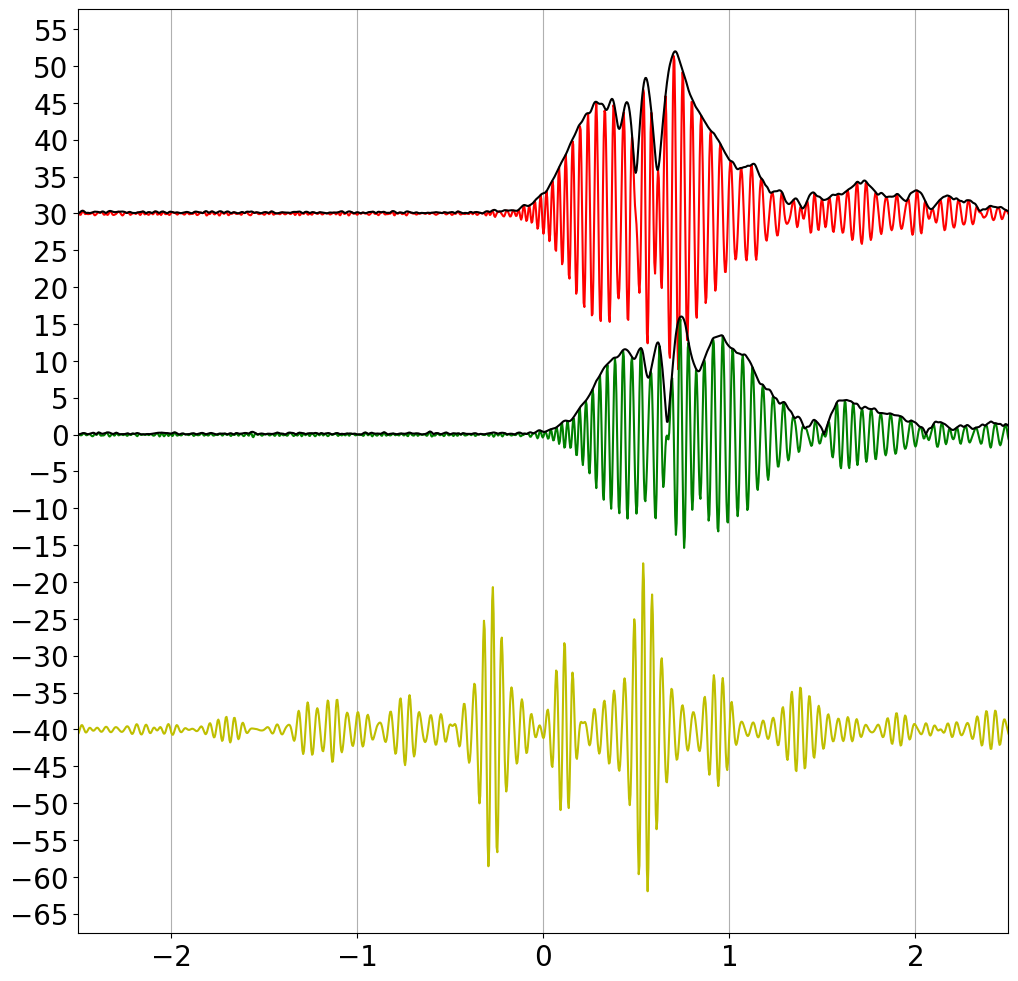

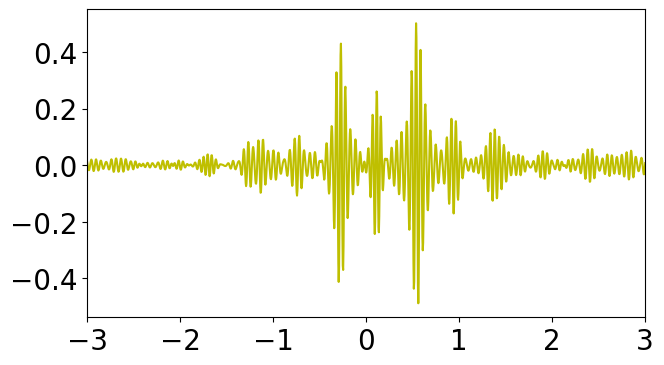

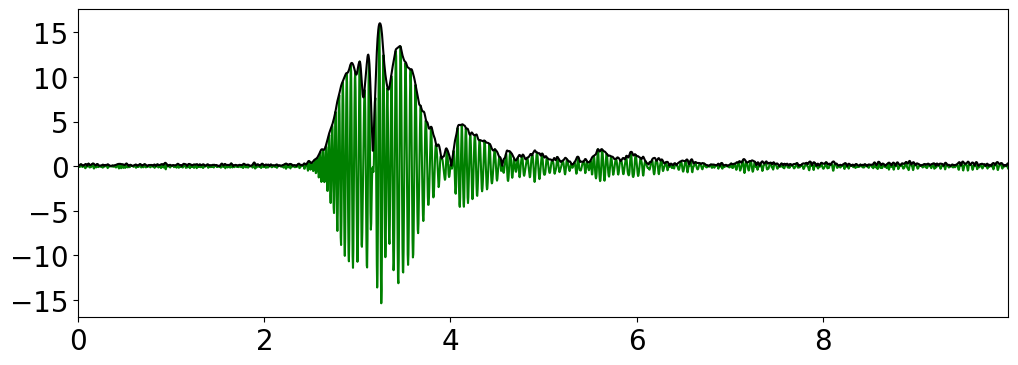

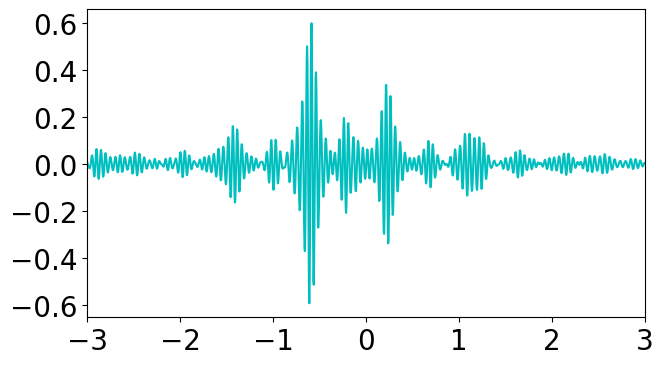

Time in minutes: 11.9354
central frequencies: 17.33 17.41 17.5 Average: 17.414394888509456
Segment 31 Time step: 250.0 80 segments
Times of pick onsets: 716.124 716.308 716.088
Shift and max: 0.532 [0.48572541] 0.04 [0.76126131]
Time in minutes: 12.2274
central frequencies: 21.32 21.26 21.28 Average: 21.28952233852919
Segment 32 Time step: 250.0 80 segments
Times of pick onsets: 733.644 733.776 733.584
Shift and max: 0.532 [0.49411613] 0.44 [0.55684195]
Time in minutes: 12.627333333333333
central frequencies: 17.25 17.43 17.48 Average: 17.386217641381833
Segment 33 Time step: 250.0 80 segments
Times of pick onsets: 757.64 757.752 757.636
Shift and max: 0.536 [0.5128816] 0.42 [0.53436642]
Time in minutes: 12.912333333333333
central frequencies: 21.33 21.48 21.58 Average: 21.463968210516143
Segment 34 Time step: 250.0 80 segments
Times of pick onsets: 774.74 774.908 774.768
Shift and max: 0.536 [0.49865679] -0.024 [0.54602956]
Time in minutes: 13.274933333333333
central frequencies: 17.1

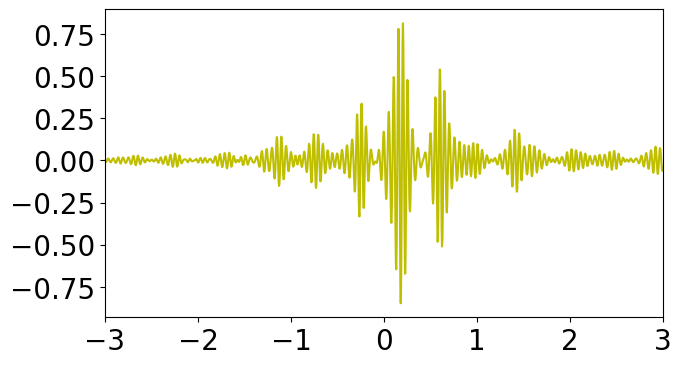

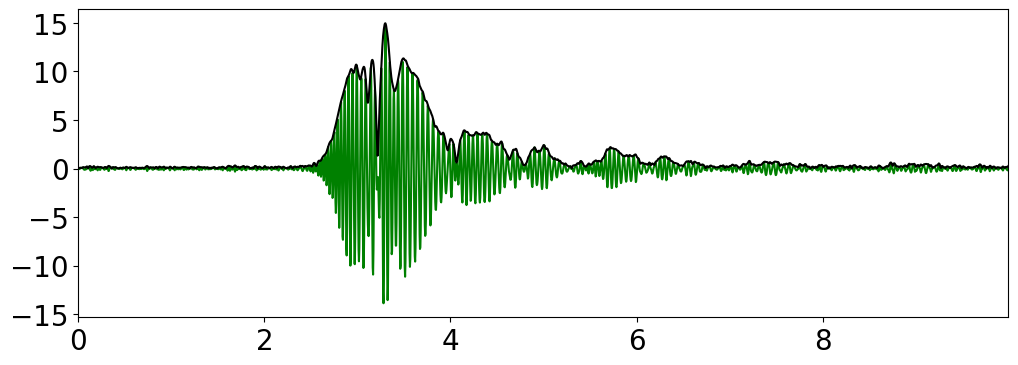

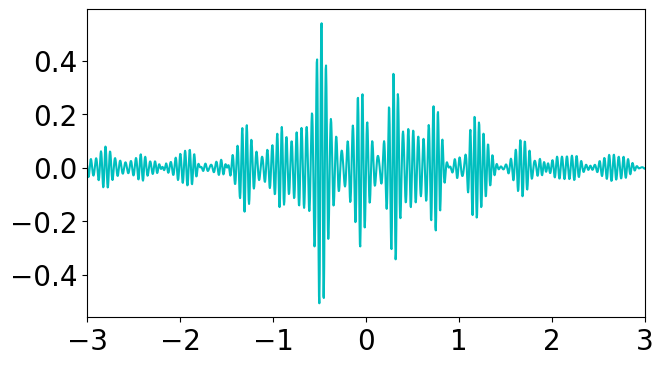

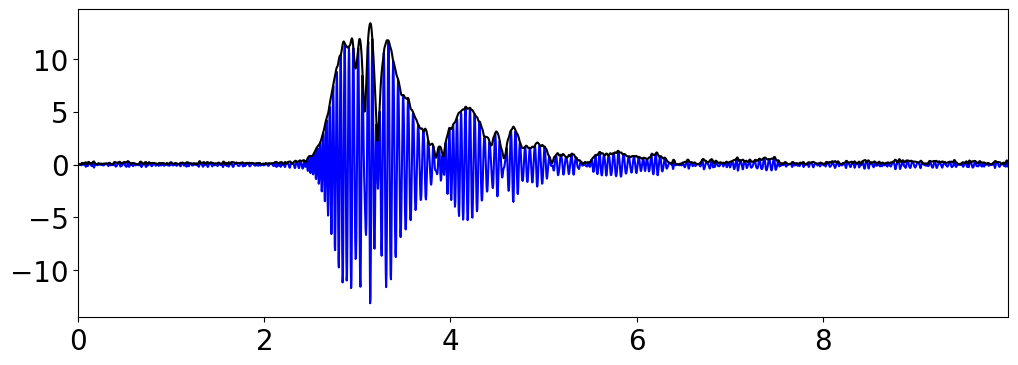

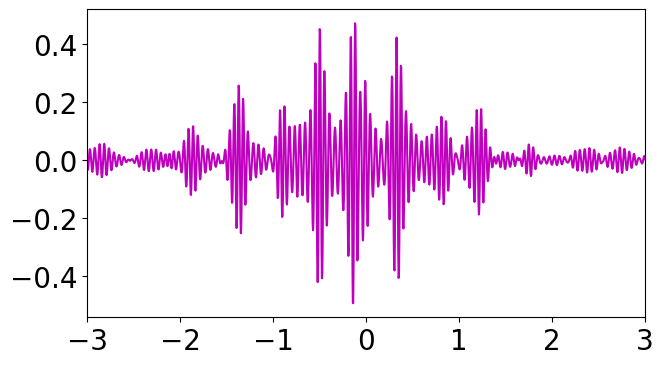

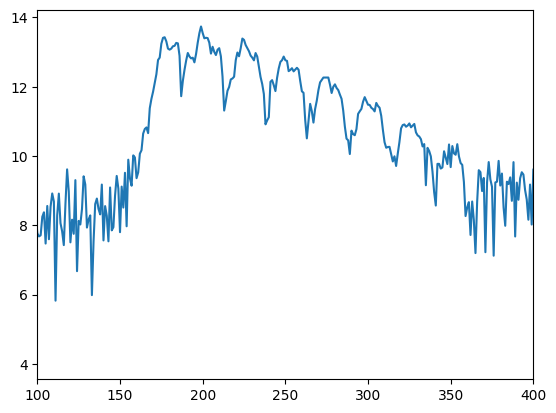

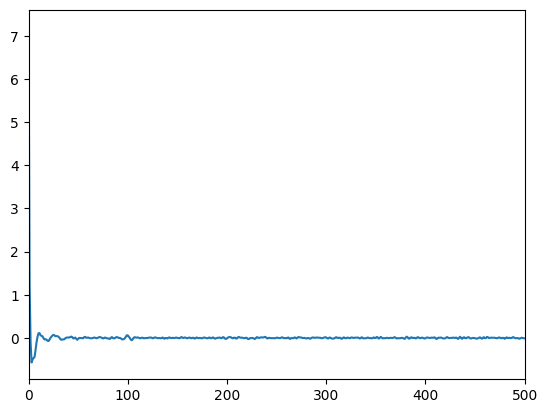

Time in minutes: 15.256133333333334
central frequencies: 17.31 17.37 17.16 Average: 17.279990688939836
Segment 41 Time step: 250.0 80 segments
Times of pick onsets: 915.368 915.568 915.484
Shift and max: 0.16 [0.84416348] -0.12 [0.67120362]
Time in minutes: 15.545133333333332
central frequencies: 20.94 20.72 21.04 Average: 20.899256504453717
Segment 42 Time step: 250.0 80 segments
Times of pick onsets: 932.708 932.928 932.884
Shift and max: 0.224 [0.69596294] -0.504 [0.4493716]
Time in minutes: 15.914866666666667
central frequencies: 17.28 17.21 17.14 Average: 17.20907730134679
Segment 43 Time step: 250.0 80 segments
Times of pick onsets: 954.892 955.192 955.096
Shift and max: 0.18 [0.80512843] -0.128 [0.60352229]
Time in minutes: 16.2056
central frequencies: 21.01 20.69 20.95 Average: 20.88118612948185
Segment 44 Time step: 250.0 80 segments
Times of pick onsets: 972.336 972.624 972.52
Shift and max: 0.636 [0.51101011] -0.512 [0.451564]
Time in minutes: 16.594466666666666
central freq

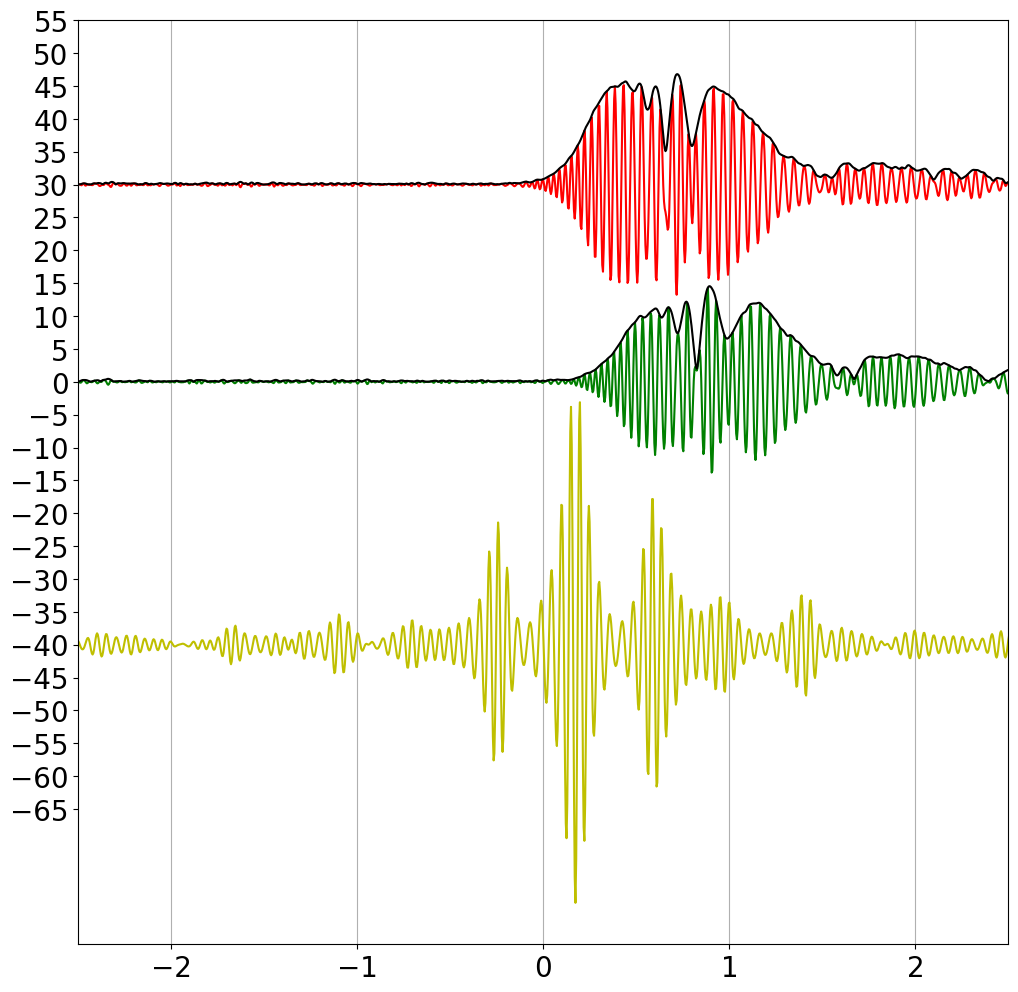

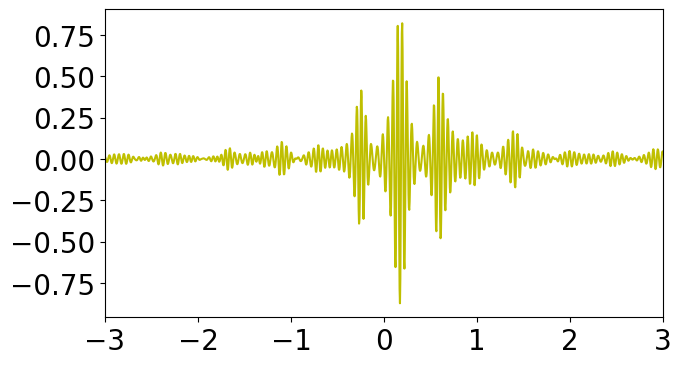

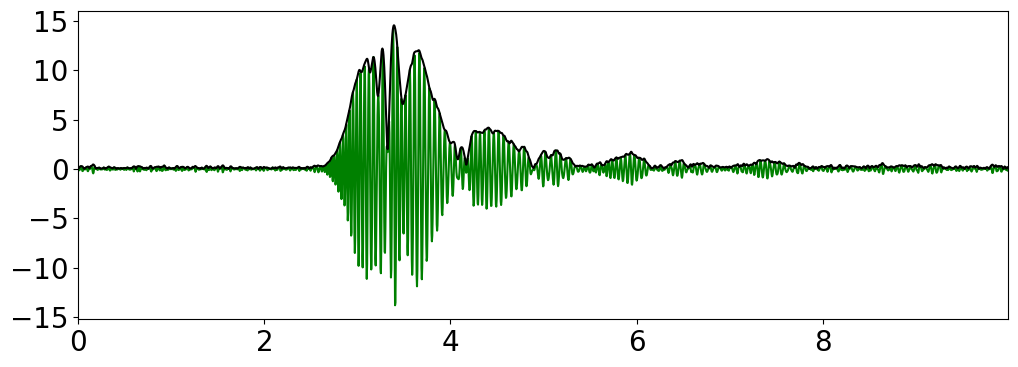

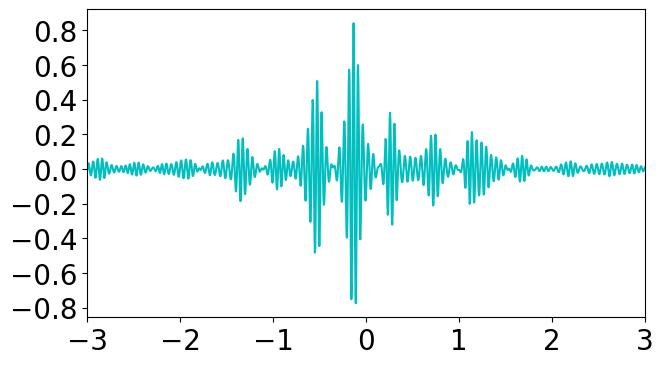

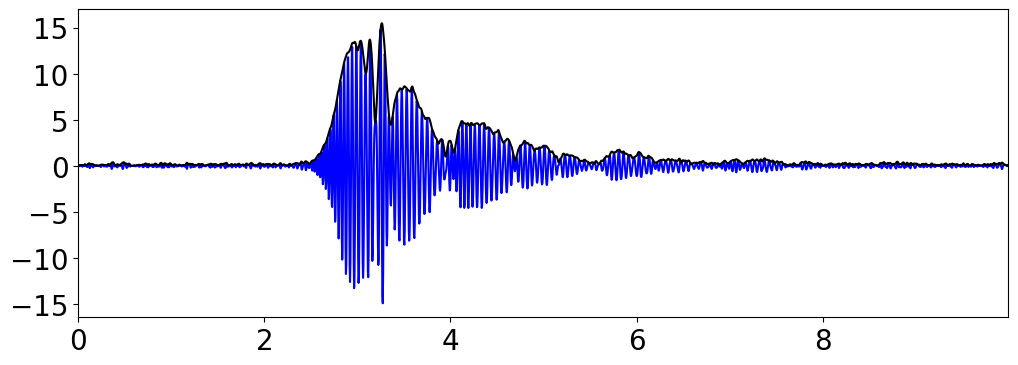

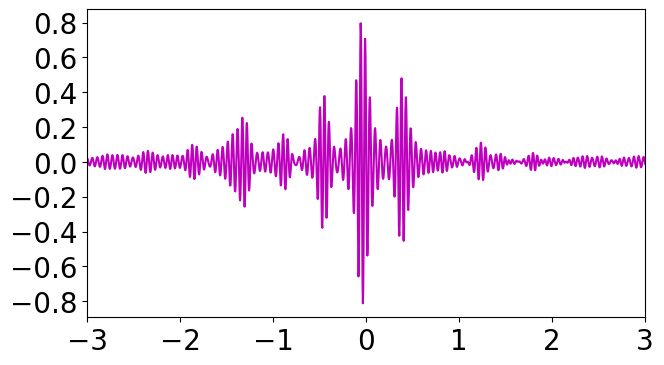

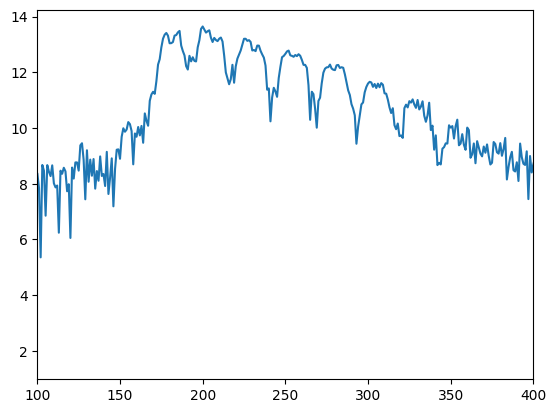

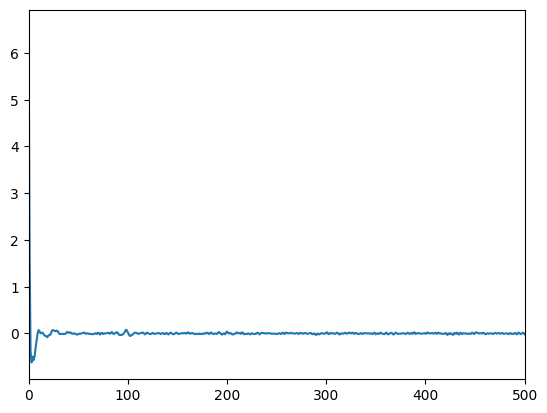

Time in minutes: 18.540733333333332
central frequencies: 17.21 17.51 17.49 Average: 17.40295122482628
Segment 51 Time step: 250.0 80 segments
Times of pick onsets: 1112.444 1112.656 1112.452
Shift and max: 0.568 [0.56111625] -0.056 [0.61032633]
Time in minutes: 18.831466666666664
central frequencies: 21.17 21.3 21.51 Average: 21.328008320561384
Segment 52 Time step: 250.0 80 segments
Times of pick onsets: 1129.888 1130.112 1130.012
Shift and max: 0.56 [0.5084813] -0.048 [0.76438797]
Time in minutes: 19.220666666666666
central frequencies: 17.3 17.54 17.53 Average: 17.454793370754825
Segment 53 Time step: 250.0 80 segments
Times of pick onsets: 1153.24 1153.36 1153.28
Shift and max: 0.544 [0.55734363] -0.056 [0.65323619]
Time in minutes: 19.51086666666667
central frequencies: 20.9 21.18 21.29 Average: 21.127818782296597
Segment 54 Time step: 250.0 80 segments
Times of pick onsets: 1170.652 1170.888 1170.768
Shift and max: 0.536 [0.52914168] -0.056 [0.78641884]
Time in minutes: 19.8812
c

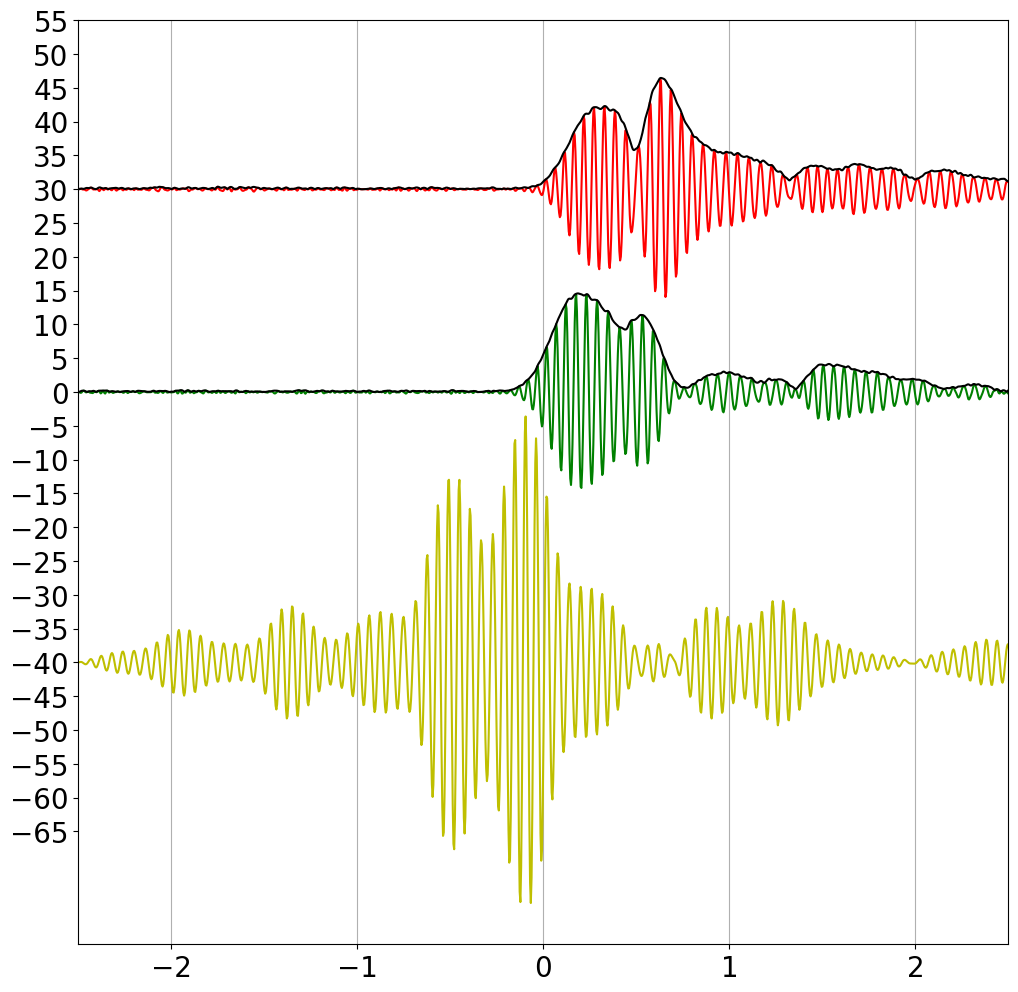

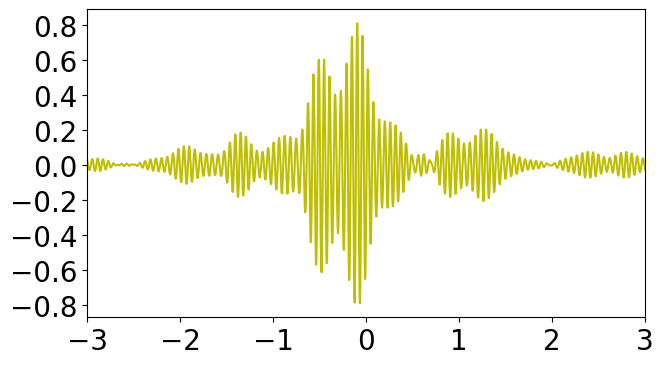

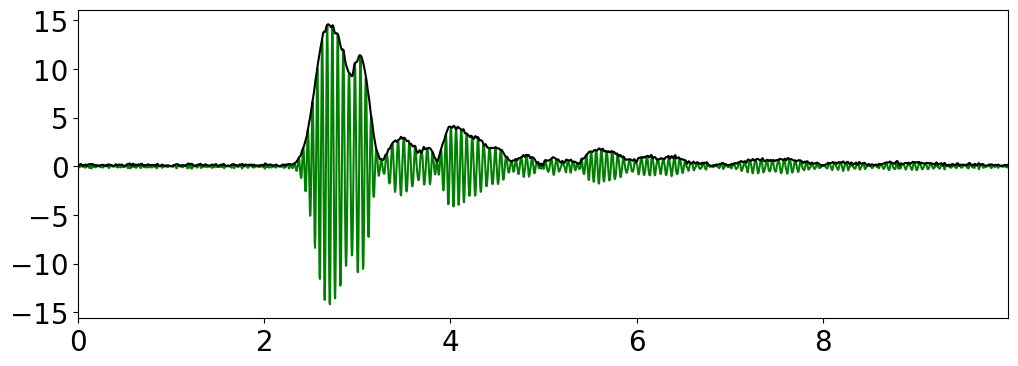

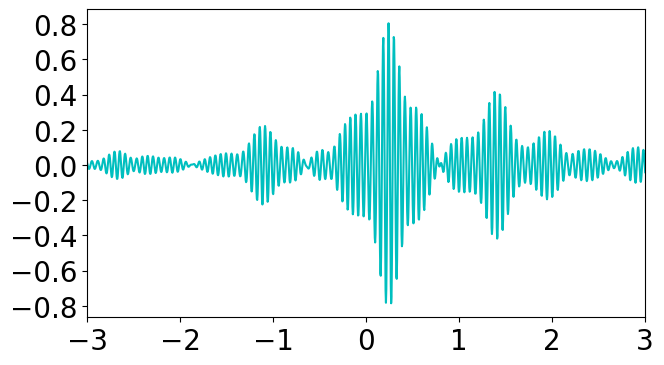

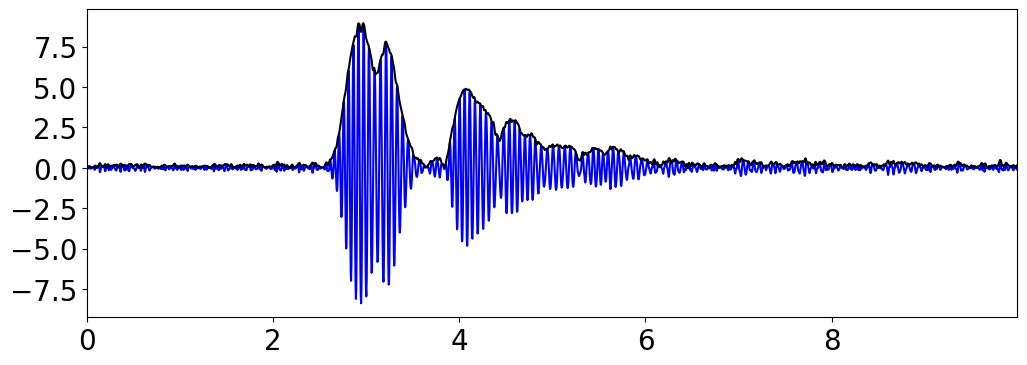

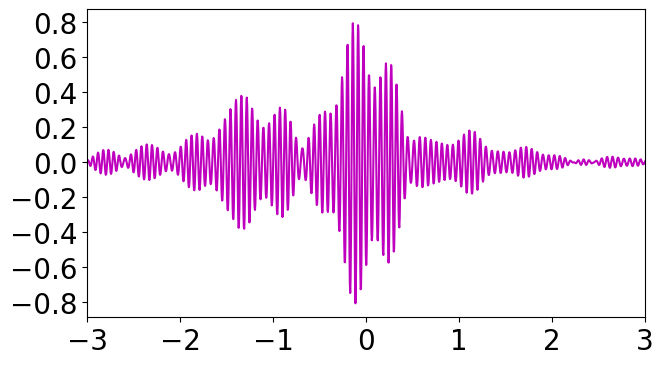

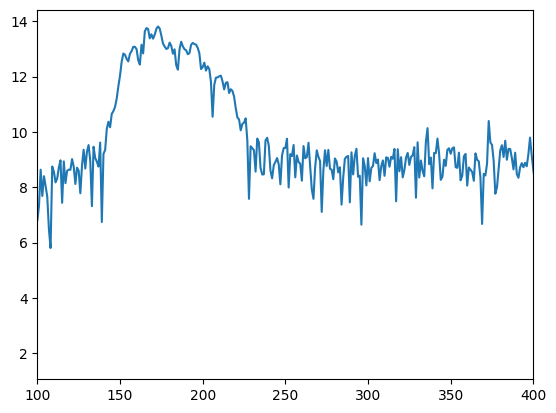

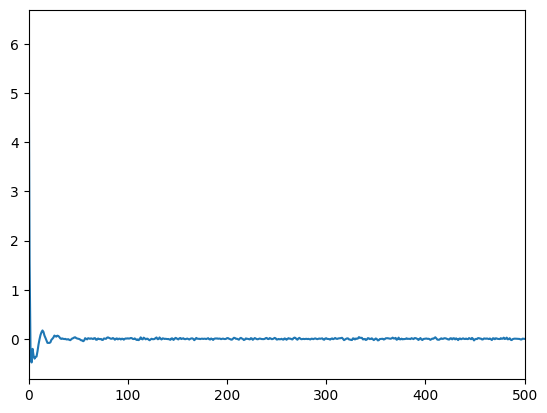

Time in minutes: 23.845266666666664
central frequencies: 21.24 21.34 21.7 Average: 21.427452797796107
Segment 62 Time step: 250.0 80 segments
Times of pick onsets: 1430.716 1430.6 1430.932
Shift and max: -0.112 [0.76300551] -0.132 [0.69346419]
negative delay and s1 > s2
Time in minutes: 24.209933333333332
central frequencies: 17.44 17.32 17.42 Average: 17.393727314298634
Segment 63 Time step: 250.0 80 segments
Times of pick onsets: 1452.596 1452.496 1452.784
Shift and max: -0.124 [0.74853234] -0.124 [0.76177785]
negative delay and s1 > s2
Time in minutes: 24.496733333333335
central frequencies: 21.06 21.07 21.49 Average: 21.205863341553457
Segment 64 Time step: 250.0 80 segments
Times of pick onsets: 1469.804 1469.716 1469.956
Shift and max: -0.124 [0.67823568] -0.116 [0.749685]
negative delay and s1 > s2
Time in minutes: 24.868266666666667
central frequencies: 17.56 17.37 17.51 Average: 17.478494890842466
Segment 65 Time step: 250.0 80 segments
Times of pick onsets: 1492.096 1491.944 

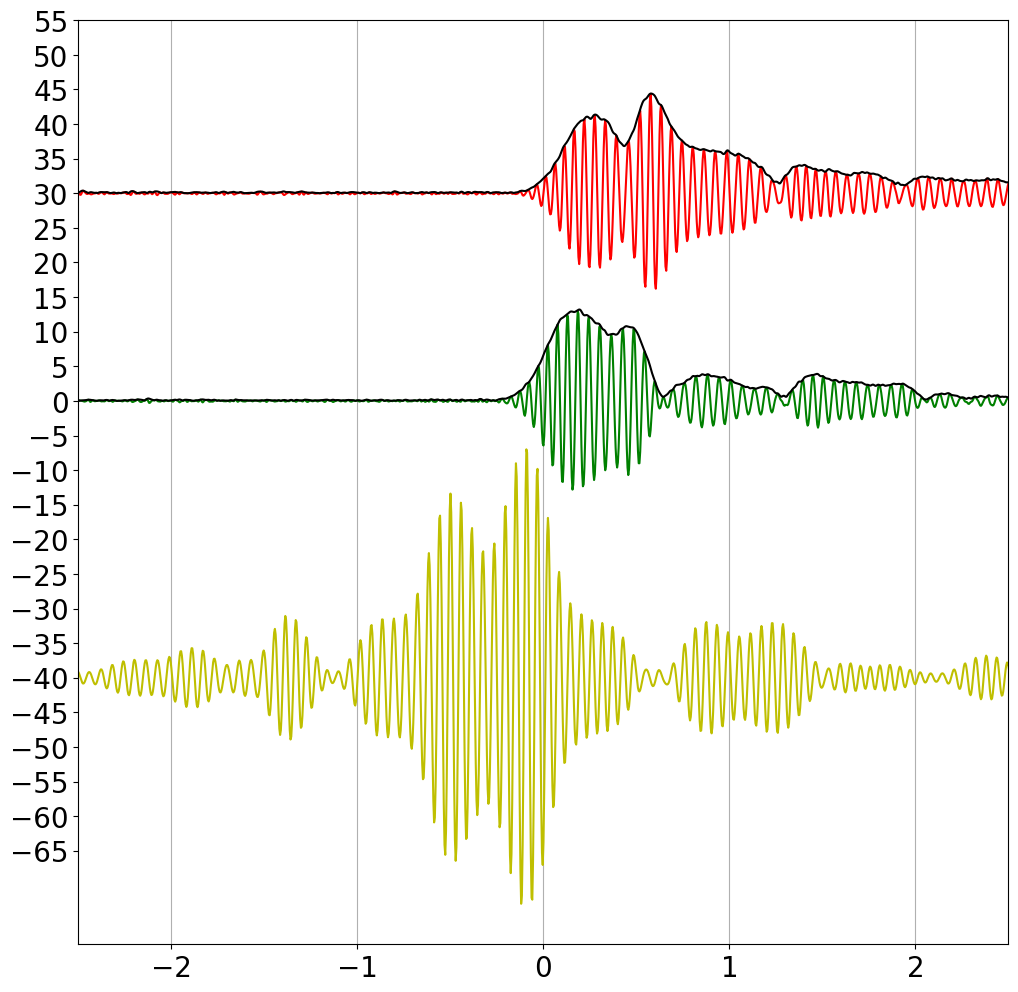

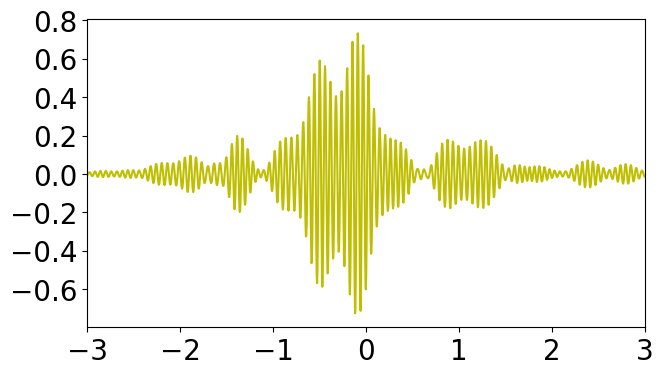

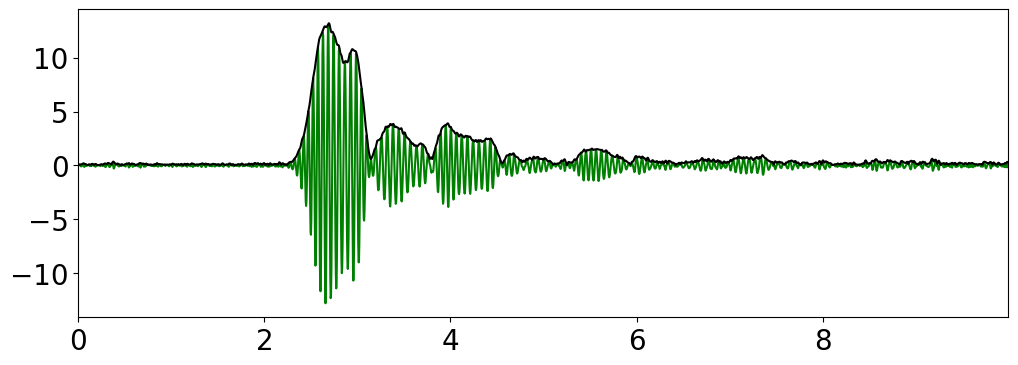

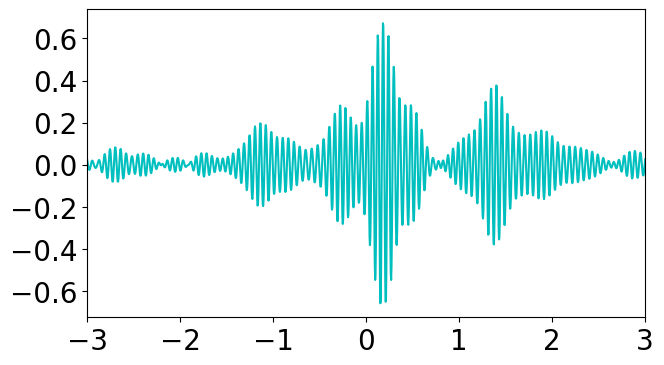

In [ ]:
#
# Read from disk and process the waveforms
#
#
# Read waveform segments around individual first hydrophone picks
# on all three hydrophones. Separate A and B calls using the central
# frequency
#
mincor=0.5
dT = 10
ndT = dT*250+1
picktimes = True
adjustCC = False
plotdelay="delays_"+timestring+"_"+str(Interval)+".png"
plotpdelay="pdelays_"+timestring+"_"+str(Interval)+".png"
plotamp="amps_"+timestring+"_"+str(Interval)+".png"
plotdistance="dist_"+timestring+"_"+str(Interval)+".png"
plotdistance_cor="cor_dist_"+timestring+"_"+str(Interval)+".png"
#
# Get epoch time from UTCDateTime
# Get two hours of data
#
delay12 = np.empty(0)
delay31 = np.empty(0)
delay23 = np.empty(0)
pdelay12 = np.empty(0)
pdelay31 = np.empty(0)
pdelay23 = np.empty(0)

a1 = np.empty(0)
a2 = np.empty(0)
a3 = np.empty(0)
pa1 = np.empty(0)
pa2 = np.empty(0)
pa3 = np.empty(0)
times = np.empty(0)
typeAB = np.empty(0)
maxcor12 = np.empty(0)
maxcor31 = np.empty(0)
tpoints = np.empty(0)
tppoints = np.empty(0)
tseg=np.empty(ndT)
tcseg=np.empty(1501)
nt=0
while nt<ndT:
  tseg[nt] = nt/250.
  nt+=1
nt=0
while nt<1501:
  tcseg[nt] = nt/250.-3.
  nt+=1
A1=np.empty(0)
A2=np.empty(0)
A3=np.empty(0)
A = np.zeros([0,2])
#print(A)
B = np.zeros(0)
C = np.zeros(2)
C[0] = 1.
C[1] = 1.
print(C)
a12=np.zeros(0)
a31=np.zeros(0)
#
k = 0
n10 = 0
maxdel = 100.
#
#
mseedfileS2="H11S2_"+timestring+"_"+str(Interval)+".mseed"
mseedfileS3="H11S3_"+timestring+"_"+str(Interval)+".mseed"
mseedfileS1="H11S1_"+timestring+"_"+str(Interval)+".mseed"
sectionfile1A="section1A_H11S1_"+timestring+"_"+str(Interval)+".png"
sectionfile1B="section1B_H11S1_"+timestring+"_"+str(Interval)+".png"
sectionfile2A="section2A_H11S2_"+timestring+"_"+str(Interval)+".png"
sectionfile2B="section2B_H11S2_"+timestring+"_"+str(Interval)+".png"
sectionfile3A="section3A_H11S3_"+timestring+"_"+str(Interval)+".png"
sectionfile3B="section3B_H11S3_"+timestring+"_"+str(Interval)+".png"
reffile1A="ref1A_H11S1_"+timestring+"_"+str(Interval)+".png"
reffile1B="ref1B_H11S1_"+timestring+"_"+str(Interval)+".png"
reffile2A="ref2A_H11S1_"+timestring+"_"+str(Interval)+".png"
reffile2B="ref2B_H11S1_"+timestring+"_"+str(Interval)+".png"
reffile3A="ref3A_H11S1_"+timestring+"_"+str(Interval)+".png"
reffile3B="ref3B_H11S1_"+timestring+"_"+str(Interval)+".png"
#
st1 = read(path+mseedfileS1)
st2 = read(path+mseedfileS2)
st3 = read(path+mseedfileS3)
st2seg=st2
st3seg=st3
st1seg=st1
print(st2)
sta=0.1
lta=1.
env1 = flt.envelope(st1[0].detrend(type='linear').data)
env2 = flt.envelope(st2[0].detrend(type='linear').data)
env3 = flt.envelope(st3[0].detrend(type='linear').data)
dt = st1[0].stats.sampling_rate
slta1 = trg.classic_sta_lta(env1,int(sta*dt),int(lta*dt))
#st1[0].data=env1
trig1=trg.plot_trigger(st1[0],slta1,5.,4.)
on_off1 = trg.trigger_onset(slta1,5.,4.)
slta2 = trg.classic_sta_lta(env2,int(sta*dt),int(lta*dt))
trig2=trg.plot_trigger(st2[0],slta2,5.,4.)
on_off2 = trg.trigger_onset(slta2,5.,4.)
slta3 = trg.classic_sta_lta(env3,int(sta*dt),int(lta*dt))
trig3=trg.plot_trigger(st3[0],slta1,5.,4.)
on_off3 = trg.trigger_onset(slta3,5.,4.)
print("length of envelope:",len(env1))
#print(on_off1*(1./dt))
nseg = len(on_off1)
print("number of picks env1:" , nseg)
nseg2 = len(on_off2)
print("number of picks env2:" , nseg2)
nseg3 = len(on_off3)
print("number of picks env3:" , nseg3)
first = True
npick = 0
while k < nseg:
#
# Find detection on other envelope within +- 3s.
# Skip if less than three seconds after previous pick
#
  if (k > 0 and (on_off1[k][0]-on_off1[k-1][0])/dt < 3.):
    k += 1
    continue
  if (picktimes):
    yes2 = False
    yes3 = False
    for det2 in range (len(on_off2)):
      if (abs(on_off2[det2][0]-on_off1[k][0])/dt) < 3 :
        yes2 = True
        break
    for det3 in range (len(on_off3)):
      if (abs(on_off3[det3][0]-on_off1[k][0])/dt) < 3 :
        yes3 = True
        break
    if (yes2 and yes3):
      pdelay12 = np.append(pdelay12,(on_off2[det2][0]-on_off1[k][0])/dt )
      pdelay31 = np.append(pdelay31,(on_off1[k][0]-on_off3[det3][0])/dt )
      pdelay23 = np.append(pdelay23,(on_off3[det3][0]-on_off2[det2][0])/dt )
      tppoints = np.append(tppoints,(firsttime+on_off1[k][0]/dt)/60.)
      npick += 1
    else :
      k += 1
      continue
  startseg = starttime+on_off1[k][0]/dt - dT/4
  endseg = startseg+dT
  print("Time in minutes:", on_off1[k][0]/dt/60)
  raw1 = st1seg[0].slice(startseg,endseg).detrend(type='linear').data
  raw2 = st2[0].slice(startseg,endseg).detrend(type='linear').data
  raw3 = st3[0].slice(startseg,endseg).detrend(type='linear').data
  w1 = flt.bandpass(st1seg[0].slice(startseg,endseg).detrend(type='linear').data, 10, 50, dt)
  w2 = flt.bandpass(st2seg[0].slice(startseg,endseg).detrend(type='linear').data, 10, 50, dt)
  w3 = flt.bandpass(st3seg[0].slice(startseg,endseg).detrend(type='linear').data, 10, 50, dt)
  fk = [-1,1.]
  cfreq1 = frq.central_frequency(w1, dt, 0.5, fk)
  cfreq2 = frq.central_frequency(w2, dt, 0.5, fk)
  cfreq3 = frq.central_frequency(w3, dt, 0.5, fk)
  cfreq = (cfreq1+cfreq2+cfreq3)/3.
  print("central frequencies:", round(cfreq1,2), round(cfreq2,2), round(cfreq3,2), "Average:",cfreq)
#  w1 = st1seg.slice(startseg,endseg)
#  w2 = st2seg.slice(startseg,endseg)
#  w3 = st3seg.slice(startseg,endseg)
  n1 = len(w1)
  n2 = len(w2)
  if (n1 != 1): exit(1)
  print ("Segment",k,"Time step:", dt, nseg, "segments")
  if (picktimes and yes2 and yes3) :
    print ("Times of pick onsets:", on_off1[k][0]/dt, on_off2[det2][0]/dt, on_off3[det3][0]/dt)
  cross12=cc.correlate(w2,w1, shift=750, demean=True,
                       normalize='naive', method='auto')
  cross31=cc.correlate(w1,w3, shift=750, demean=True,
                       normalize='naive', method='auto')
  cross23=cc.correlate(w3,w2, shift=750, demean=True,
                       normalize='naive', method='auto')
  (shift12,max12)=cc.xcorr_max(cross12,abs_max=False)
  (shift31,max31)=cc.xcorr_max(cross31,abs_max=False)
  (shift23,max23)=cc.xcorr_max(cross23,abs_max=False)
  if (first):
    trace1A = st.Trace()
    sect1A=st.Stream(traces=[trace1A])
    trace1B = st.Trace()
    sect1B=st.Stream(traces=[trace1B])
    trace2A = st.Trace()
    sect2A=st.Stream(traces=[trace2A])
    trace2B = st.Trace()
    sect2B=st.Stream(traces=[trace2B])
    trace3A = st.Trace()
    sect3A=st.Stream(traces=[trace3A])
    trace3B = st.Trace()
    sect3B=st.Stream(traces=[trace3B])
    sect1A.remove(trace1A)
    sect1B.remove(trace1B)
    sect2A.remove(trace2A)
    sect2B.remove(trace2B)
    sect3A.remove(trace3A)
    sect3B.remove(trace3B)
    trace1A = st.Trace()
    trace1B = st.Trace()
    ref1A=st.Stream(traces=[trace1A])
    ref1B=st.Stream(traces=[trace1B])
    trace2A = st.Trace()
    trace2B = st.Trace()
    ref2A=st.Stream(traces=[trace2A])
    ref2B=st.Stream(traces=[trace2B])
    trace3A = st.Trace()
    trace3B = st.Trace()
    ref3A=st.Stream(traces=[trace3A])
    ref3B=st.Stream(traces=[trace3B])
    ref1A.remove(trace1A)
    ref1B.remove(trace1B)
    ref2A.remove(trace2A)
    ref2B.remove(trace2B)
    ref3A.remove(trace3A)
    ref3B.remove(trace3B)
  if (picktimes and yes2 and yes3):
    senv1=flt.envelope(w1)
    senv2=flt.envelope(w2)
    senv3=flt.envelope(w3)
    pa1=np.append(pa1,senv1.max())
    pa2=np.append(pa2,senv2.max())
    pa3=np.append(pa3,senv3.max())
    if(cfreq < 20):
      typeAB = np.append(typeAB, 'A')
    else:
      typeAB = np.append(typeAB, 'B')
  if (not picktimes and not first
      #and (abs(shift12) < 2 or abs(shift13) < 2
      and ( max12 < mincor or max31 < mincor
      or abs(prevdelay12-shift12/dt) > maxdel or abs(prevdelay31-shift31/dt)  > maxdel)) :
    print("k=", k, "shift or maxcor too small or too large jump in delay:", shift12, shift31)
    print('% 6.2f' % max12, '% 6.2f' % max31)
    print('% 6.2f' % abs(prevdelay12-shift12/dt), '% 6.2f' % abs(prevdelay31-shift31/dt))
#    print('% 6.2f' % max13)
    k += 1
    continue
  first = False
  prevdelay12 = shift12/dt
  prevdelay31 = shift31/dt
  times = np.append(times,firsttime+on_off1[k][0]/dt)
  delay12=np.append(delay12,shift12/dt)
  delay31=np.append(delay31,shift31/dt)
  delay23=np.append(delay23,shift23/dt)
  if (adjustCC) :
    if abs(pdelay12[npick-1]-shift12/dt)  < 0.1 :
      pdelay12[npick-1] = shift12/dt
    if abs(pdelay31[npick-1]-shift31/dt)  < 0.1 :
      pdelay31[npick-1] = shift31/dt
    if abs(pdelay23[npick-1]-shift23/dt)  < 0.1 :
      pdelay23[npick-1] = shift23/dt
  max12=np.append(maxcor12,max12)
  max31=np.append(maxcor31,max31)
  tpoints=np.append(tpoints,(firsttime+on_off1[k][0]/dt)/60.)
  print ("Shift and max:",shift12/dt,max12,shift31/dt,max31)
  senv1=flt.envelope(w1)
  senv2=flt.envelope(w2)
  senv3=flt.envelope(w3)
  cenv12=flt.envelope(cross12)
  cenv23=flt.envelope(cross23)
  cenv31=flt.envelope(cross31)
#
  a1=np.append(a1,senv1.max())
  a2=np.append(a2,senv2.max())
  a3=np.append(a3,senv3.max())
  #
  if (senv1.max() > senv2.max() and shift12 < 0):
    print("negative delay and s1 > s2")
  if (abs(shift12) < 0.00001):
    shift12 = 0.00001
#
#    Build-up section
#
  tr = st.Trace()
#  tr.data = cross12
  tr.data = cenv12
  tr.stats.distance = (startseg - starttime)/0.06
  tr.stats.sampling_rate=250
#  tr.stats.starttime = -3.
  if (cfreq > 20):
    sect1B.append(tr)
  else:
    sect1A.append(tr)
#  print(sect2)
#
  tr = st.Trace()
#  tr.data = cross13
#  sw2 = np.roll(w2, int(-1*pdelay12[npick-1]*dt))
  tr.data = cenv23
  tr.stats.distance = (startseg-starttime)/0.06
  tr.stats.sampling_rate=250
#  tr.stats.starttime = -3.
  if (cfreq > 20):
    sect2B.append(tr)
  else:
    sect2A.append(tr)
#
  tr = st.Trace()
#  tr.data = cross23
#  sw3 = np.roll(w3, int(-1*pdelay31[npick-1]*dt))
  tr.data = cenv31
  tr.stats.distance = (startseg-starttime)/0.06
  tr.stats.sampling_rate=250
#  tr.stats.starttime = -3.
  if (cfreq > 20):
    sect3B.append(tr)
  else:
    sect3A.append(tr)
#
#
  if (picktimes) :
    tr = st.Trace()
    sw1 = np.roll(senv1, 0)
    for j in range(len(sw1)):
#      if (j > 600):
        sw1[j] *= j
    tr.data = sw1
    tr.stats.distance = (startseg - starttime)/0.06
    tr.stats.starttime = -3.
    if(cfreq > 20):
      ref1B.append(tr)
    else:
      ref1A.append(tr)

  #  print(sect2)

    tr = st.Trace()
    sw2 = np.roll(senv2, int(-1*pdelay12[npick-1]*dt))
    for j in range(len(sw2)):
      sw2[j] *= j
    tr.data = sw2
    tr.stats.distance = (startseg-starttime)/0.06
    tr.stats.starttime = -3.
    if (cfreq > 20):
      ref2B.append(tr)
    else:
      ref2A.append(tr)

    tr = st.Trace()
    sw3 = np.roll(senv3, int(-1*pdelay31[npick-1]*dt))
    for j in range(len(sw3)):
      sw3[j] *= j
    tr.data = sw3
    tr.stats.distance = (startseg-starttime)/0.06
    tr.stats.starttime = -3.
    if (cfreq > 20):
      ref3B.append(tr)
    else:
      ref3A.append(tr)
#
#
  n10+=1
  if n10 == 10:
    print(ndT)
    fig, ax = plt.subplots(figsize=(12, 12), )
    ax.margins(x=0)
    plt.plot(tseg[0:ndT-1]-dT/4, 30+w1[0:ndT-1]/1000,'r-',tseg[0:ndT-1]-dT/4,30+senv1[0:ndT-1]/1000,'k-',
             tseg[0:ndT-1]-dT/4, w2[0:ndT-1]/1000,'g-',tseg[0:ndT-1]-dT/4,senv2[0:ndT-1]/1000,'k-',
             tcseg, -40+45*cross12,'y-')
    plt.xticks(fontsize=20)
    plt.yticks(ticks=[-65,-60,-55,-50,-45,-40,-35,-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30,35,40,45,50,55],fontsize=20)
    plt.xlim([-2.5,2.5])
    ax.grid(True, axis='x')
    plt.show()
    fig, ax = plt.subplots(figsize=(7.2, 4), )
    ax.margins(x=0)
    plt.plot(tcseg, cross12,'y-')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    fig, ax = plt.subplots(figsize=(12, 4), )
    ax.margins(x=0)
    plt.plot(tseg[0:ndT-1], w2[0:ndT-1]/1000,'g-',tseg[0:ndT-1],senv2[0:ndT-1]/1000,'k-')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    fig, ax = plt.subplots(figsize=(7.2, 4), )
    ax.margins(x=0)
    plt.plot(tcseg, cross23,'c-')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    fig, ax = plt.subplots(figsize=(12, 4), )
    ax.margins(x=0)
    plt.plot(tseg[0:ndT-1], w3[0:ndT-1]/1000,'b-',tseg[0:ndT-1],senv3[0:ndT-1]/1000,'k-')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    fig, ax = plt.subplots(figsize=(7.2, 4), )
    ax.margins(x=0)
    plt.plot(tcseg, cross31,'m-')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
#    fig, ax = plt.subplots(figsize=(12, 4), )
#    plt.plot(tseg[0:ndT-1],senv1[0:ndT-1],'r-',tseg[0:ndT-1],senv2[0:ndT-1],'g-',
#              tseg[0:ndT-1],senv3[0:ndT-1],'b-')
#    plt.plot(cross12,'r',cross13,'g',cross23,'b')
#    pstr="{num} minutes".format(num=int(on_off1[k][0]/dt/60))
#    plt.title(pstr)
#    plt.show()
    spectrum = np.fft.fft(w2)
    plt.plot(np.log(np.abs(spectrum)))
    plt.xlim([100,400])
    plt.show()
    ceps = np.fft.ifft(np.log(np.abs(spectrum))).real
    plt.plot(ceps)
    plt.xlim([0,500])
    plt.show()
    n10=0
  k+=1
#
#
plotDT = True
if (plotDT):
  D = 1.5
  d = 0.74
  xp = np.load(path+"xp"+"_"+timestring+"_"+str(Interval)+".npy")
  yp = np.load(path+"yp"+"_"+timestring+"_"+str(Interval)+".npy")
  zp = np.load(path+"zp"+"_"+timestring+"_"+str(Interval)+".npy")
  tp = np.load(path+"tp"+"_"+timestring+"_"+str(Interval)+".npy")
  siz = len(tp)
  s1DT = np.empty(siz)
  s2DT = np.empty(siz)
  s3DT = np.empty(siz)
  for k in range (siz):
    #
    #  Compute the difference between direct and reflect time
    #  for an ocean depth and the depths of sensors
    #
    x = (xp[k], yp[k],0.)
    pS1 = (S1[0],S1[1],0.)
    pS2 = (S2[0],S2[1],0.)
    pS3 = (S3[0],S3[1],0.)
    d1 = Norm(Diff(pS1,x))
    d2 = Norm(Diff(pS2,x))
    d3 = Norm(Diff(pS3,x))
    l1 = math.sqrt(d1*d1+d*d)
    l2 = math.sqrt(d2*d2+d*d)
    l3 = math.sqrt(d3*d3+d*d)
    L1 = math.sqrt(d1*d1+D*D)
    L2 = math.sqrt(d2*d2+D*D)
    L3 = math.sqrt(d3*d3+D*D)
    s1DT[k] = 750+250*(L1*(2-l1/L1)-l1)/hvel
    s2DT[k] = 750+250*(L2*(2-l2/L2)-l2)/hvel
    s3DT[k] = 750+250*(L3*(2-l3/L3)-l3)/hvel
  fig, ax = plt.subplots(1, 1, figsize=(12, 6),  )
  plt.plot(tp-tp[0],s1DT,'yo')
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  plt.xlabel('Time in minutes',fontsize=20)
  plt.ylabel('Time Difference (s)',fontsize=20)
  plt.show()
  fig, ax = plt.subplots(1, 1, figsize=(12, 6),  )
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  plt.xlabel('Time in minutes',fontsize=20)
  plt.ylabel('Time Difference (s)',fontsize=20)
  plt.plot(tp-tp[0],s2DT,'yo')
  plt.show()
  fig, ax = plt.subplots(1, 1, figsize=(12, 6),  )
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  plt.xlabel('Time in minutes',fontsize=20)
  plt.ylabel('Time Difference (s)',fontsize=20)
  plt.plot(tp-tp[0],s3DT,'yo')
  plt.show()

sect1A.plot(outfile=sectionfile1A,  format = 'png' , type='section',
            recordstart=1, recordlength= 5, color = 'red', fillcolors= ('red','black') )
sect1B.plot(outfile=sectionfile1B,  format = 'png' , type='section',
            recordstart=1, recordlength= 5, color = 'red', fillcolors= ('red','black') )
sect2A.plot(outfile=sectionfile2A,  format = 'png' , type='section',
            recordstart=1, recordlength= 5, color = 'green', fillcolors= ('green','black') )
sect2B.plot(outfile=sectionfile2B,  format = 'png' , type='section',
            recordstart=1, recordlength= 5, color = 'green', fillcolors= ('green','black') )
sect3A.plot(outfile=sectionfile3A,  format = 'png' , type='section',
            recordstart=1, recordlength= 5, color = 'blue', fillcolors= ('blue','black') )
sect3B.plot(outfile=sectionfile3B,  format = 'png' , type='section',
            recordstart=1, recordlength= 5, color = 'blue', fillcolors= ('blue','black') )
ref1A.plot(outfile=reffile1A, fig=fig, format = 'png' , type='section', scale=1,
       recordstart=500, recordlength= 1000,  linewidth=0.1,  color = 'red',
          fillcolors= ('red',None) )
ref1B.plot(outfile=reffile1B, fig=fig,format = 'png' , type='section', scale=1,
       recordstart=500, recordlength= 1000,  linewidth=0.1,  color = 'red',
          fillcolors= ('red',None) )
ref2A.plot(outfile=reffile2A, fig=fig, format = 'png' , type='section',scale=1,
       recordstart=500, recordlength= 1000,  linewidth=0.1,
            color = 'g', fillcolors= ('green',None) )
ref2B.plot(outfile=reffile2B, fig=fig, format = 'png' , type='section',scale=1,
       recordstart=500, recordlength= 1000,  linewidth=0.1, color = 'g',
            fillcolors= ('green',None) )
ref3A.plot(outfile=reffile3A, fig=fig, format = 'png' , type='section',scale=1,
       recordstart=500, recordlength= 1000,  linewidth=0.1,
            color = 'b', fillcolors= ('blue',None ))
ref3B.plot(outfile=reffile3B, fig=fig, format = 'png' , type='section',scale=1,
       recordstart=500, recordlength= 1000,  linewidth=0.1,
            color = 'b', fillcolors= ('blue',None ))
#
fig, ax = plt.subplots(1, 1, figsize=(12, 6),  )
plt.plot(tpoints,delay12,'r.',tpoints,delay31,'g.',tpoints,delay23,'b.')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([-2.5,2.5])
plt.xlabel('Time in minutes',fontsize=16)
plt.ylabel('Delay (s)',fontsize=16)
plt.savefig(plotdelay,format='png')
plt.show()
fig, ax = plt.subplots(1, 1, figsize=(12, 6),  )
plt.plot(tppoints,pdelay12,'r.',tppoints,pdelay31,'g.',tppoints,pdelay23,'b.')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([-2.5,2.5])
plt.xlabel('Time in minutes',fontsize=16)
plt.ylabel('Delay (s)',fontsize=16)
plt.savefig(plotpdelay,format='png')
plt.show()
fig, ax = plt.subplots(1, 1, figsize=(6, 6),  )
lims = np.linspace(-0.5,0.5,22)
plt.hist(delay23+delay31+delay12, bins = lims, color='c', edgecolor= 'black')
plt.xticks(fontsize=14)
plt.yticks(fontsize=20)
plt.xlim([-0.5, 0.5])
plt.xlabel('Error (s)',fontsize=16)
plt.ylabel('Count',fontsize=16)
meanstd="Mean: {mean}".format(mean=round(np.mean(delay23+delay31+delay12),2))
meanstd=meanstd+" Std: {std}".format(std=round(np.std(delay23+delay31+delay12),2))
plt.title(meanstd)
plt.show()
fig, ax = plt.subplots(1, 1, figsize=(6, 6),  )
plt.hist(pdelay23+pdelay31+pdelay12, bins = lims, color='c', edgecolor = 'black')
plt.xticks(fontsize=14)
plt.yticks(fontsize=20)
plt.xlim([-0.5, 0.5])
plt.xlabel('Error (s)',fontsize=16)
plt.ylabel('Count',fontsize=16)
print("Mean:", np.mean(pdelay23+pdelay31+pdelay12))
print("Std:", np.std(pdelay23+pdelay31+pdelay12))
meanstd="Mean: {mean}".format(mean=round(np.mean(pdelay23+pdelay31+pdelay12),2))
meanstd=meanstd+" Std: {std}".format(std=round(np.std(pdelay23+pdelay31+pdelay12),2))
plt.title(meanstd)
plt.show()
#
# Plot amplitudes
#
fig, ax = plt.subplots(1, 1, figsize=(12, 6),  )
plt.plot(tpoints,a1,'r.',tpoints,a2,'g.',tpoints,a3,'b.')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.ylim([-2.5,2.5])
plt.xlabel('Time in minutes',fontsize=16)
plt.ylabel('Amplitude ($\u03BC$Pa)',fontsize=16)
plt.savefig(plotamp,format='png')
plt.show()
#
# Plot amplitudes ratios
#
#
fig, ax = plt.subplots(1, 1, figsize=(12, 6),  )
for k in range (len(tppoints)):
  plt.plot(tppoints[k],pa1[k]/pa2[k],'r.',tppoints[k],pa1[k]/pa3[k],'g.')
#plt.plot(tppoints,pa1,'r.',tppoints,pa2,'g.',tppoints,pa3,'b.')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.ylim([-2.5,2.5])
plt.xlabel('Time in minutes',fontsize=16)
plt.ylabel('Amplitude ratios',fontsize=16)
plt.savefig(plotamp,format='png')
plt.show()
if (picktimes):
  np.save(path+"delay12"+"_"+timestring+"_"+str(Interval),pdelay12)
  np.save(path+"delay31"+"_"+timestring+"_"+str(Interval),pdelay31)
  np.save(path+"delay23"+"_"+timestring+"_"+str(Interval),pdelay23)
  np.save(path+"times"+"_"+timestring+"_"+str(Interval),tppoints)
  np.save(path+"tp"+"_"+timestring+"_"+str(Interval),tppoints)
  np.save(path+"amp1"+"_"+timestring+"_"+str(Interval),pa1)
  np.save(path+"amp2"+"_"+timestring+"_"+str(Interval),pa2)
  np.save(path+"amp3"+"_"+timestring+"_"+str(Interval),pa3)
  np.save(path+"type"+"_"+timestring+"_"+str(Interval),typeAB)
else:
  np.save(path+"delay12"+"_"+timestring+"_"+str(Interval),delay12)
  np.save(path+"delay31"+"_"+timestring+"_"+str(Interval),delay31)
  np.save(path+"delay23"+"_"+timestring+"_"+str(Interval),delay23)
  np.save(path+"times"+"_"+timestring+"_"+str(Interval),tpoints)
  np.save(path+"tp"+"_"+timestring+"_"+str(Interval),tppoints)
  np.save(path+"amp1"+"_"+timestring+"_"+str(Interval),a1)
  np.save(path+"amp2"+"_"+timestring+"_"+str(Interval),a2)
  np.save(path+"amp3"+"_"+timestring+"_"+str(Interval),a3)
#


sampling rate and segments 250.0 1920.0
Time in minutes: 0.041666666666666664
Time in minutes: 0.08333333333333333
Time in minutes: 0.125
Time in minutes: 0.16666666666666666
Time in minutes: 0.20833333333333334
Time in minutes: 0.25
Time in minutes: 0.2916666666666667
Time in minutes: 0.3333333333333333
Time in minutes: 0.375
Time in minutes: 0.4166666666666667
Time in minutes: 0.4583333333333333
Time in minutes: 0.5
Time in minutes: 0.5416666666666666
Time in minutes: 0.5833333333333334
Time in minutes: 0.625
Time in minutes: 0.6666666666666666
Time in minutes: 0.7083333333333334
Time in minutes: 0.75
Time in minutes: 0.7916666666666666
Time in minutes: 0.8333333333333334
Time in minutes: 0.875
Time in minutes: 0.9166666666666666
Time in minutes: 0.9583333333333334
Time in minutes: 1.0
Time in minutes: 1.0416666666666667
Time in minutes: 1.0833333333333333
Time in minutes: 1.125
Time in minutes: 1.1666666666666667
Time in minutes: 1.2083333333333333
Time in minutes: 1.25
Time in minu

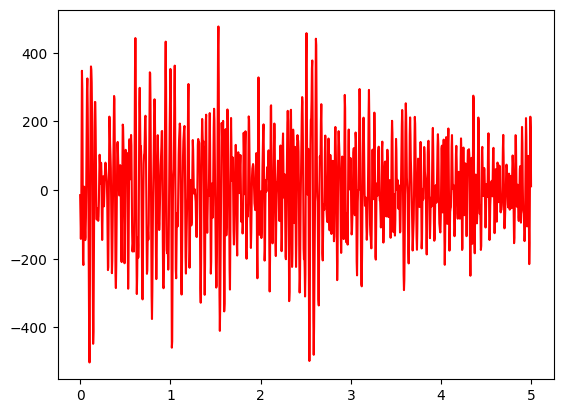

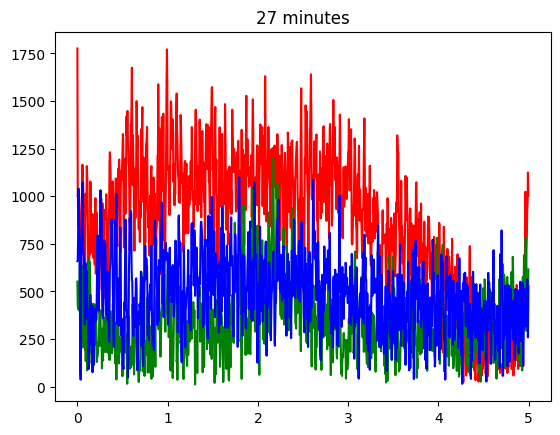

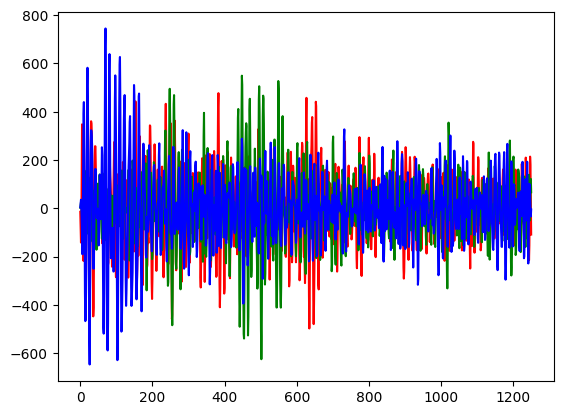

Time in minutes: 27.375
Time in minutes: 27.416666666666668
Time in minutes: 27.458333333333332
Time in minutes: 27.5
Time in minutes: 27.541666666666668
Time in minutes: 27.583333333333332
Time in minutes: 27.625
Maxima of CC: 0.23140082085613137 0.32612360359800513 0.2628910314845398
Time in minutes: 27.666666666666668
Time in minutes: 27.708333333333332
Time in minutes: 27.75
Time in minutes: 27.791666666666668
Time in minutes: 27.833333333333332
Time in minutes: 27.875
Time in minutes: 27.916666666666668
Maxima of CC: 0.18781994223373402 0.3157421471393603 0.2631378606163555
Time in minutes: 27.958333333333332
Maxima of CC: 0.22819461619703882 0.24581652392188266 0.3254922524523705
Time in minutes: 28.0
Time in minutes: 28.041666666666668
Time in minutes: 28.083333333333332
Time in minutes: 28.125
Time in minutes: 28.166666666666668
Time in minutes: 28.208333333333332
Time in minutes: 28.25
Time in minutes: 28.291666666666668
Time in minutes: 28.333333333333332
Time in minutes: 28.

Time in minutes: 45.0
Time in minutes: 45.041666666666664
Time in minutes: 45.083333333333336
Time in minutes: 45.125
Time in minutes: 45.166666666666664
Maxima of CC: 0.4360839875497091 0.38872120139596145 0.3094117354173306
Time in minutes: 45.208333333333336
Maxima of CC: 0.40687187072143416 0.293362302293141 0.25509490053690503
Time in minutes: 45.25
Time in minutes: 45.291666666666664
Time in minutes: 45.333333333333336
Time in minutes: 45.375
Time in minutes: 45.416666666666664
Time in minutes: 45.458333333333336
Time in minutes: 45.5
Time in minutes: 45.541666666666664
Time in minutes: 45.583333333333336
Time in minutes: 45.625
Time in minutes: 45.666666666666664
Time in minutes: 45.708333333333336
Time in minutes: 45.75
Time in minutes: 45.791666666666664
Time in minutes: 45.833333333333336
Maxima of CC: 0.399427077603348 0.309457568634367 0.29097957645911277
Time in minutes: 45.875
Time in minutes: 45.916666666666664
Time in minutes: 45.958333333333336
Time in minutes: 46.0
Ti

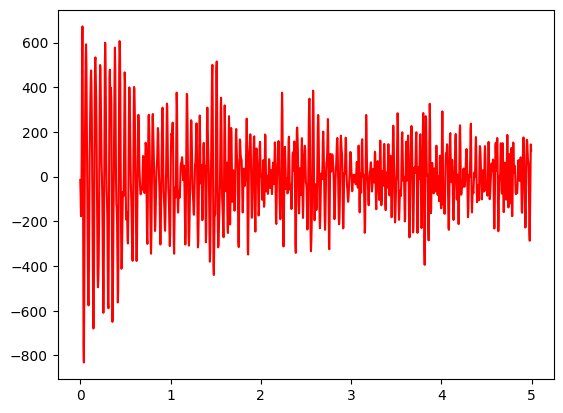

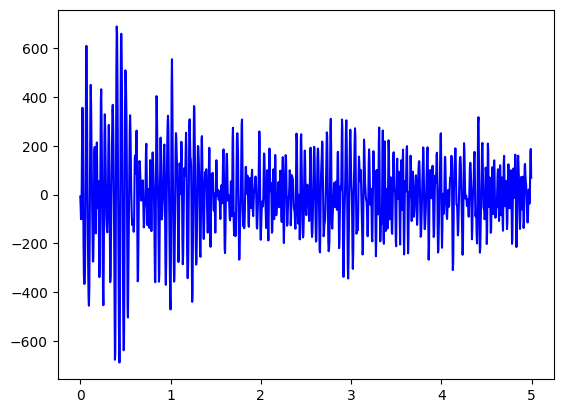

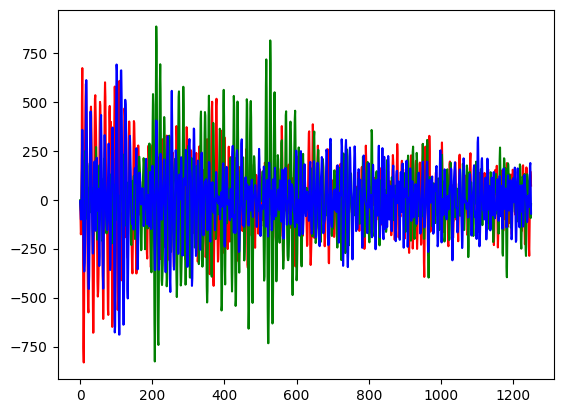

Time in minutes: 57.083333333333336
Time in minutes: 57.125
Time in minutes: 57.166666666666664
Time in minutes: 57.208333333333336
Time in minutes: 57.25
Time in minutes: 57.291666666666664
Time in minutes: 57.333333333333336
Time in minutes: 57.375
Time in minutes: 57.416666666666664
Time in minutes: 57.458333333333336
Time in minutes: 57.5
Time in minutes: 57.541666666666664
Time in minutes: 57.583333333333336
Time in minutes: 57.625
Maxima of CC: 0.3548416304963808 0.23196876231443972 0.29785309924979325
Time in minutes: 57.666666666666664
Maxima of CC: 0.2651208927262809 0.22162234377776727 0.31861296688657714
Time in minutes: 57.708333333333336
Time in minutes: 57.75
Time in minutes: 57.791666666666664
Time in minutes: 57.833333333333336
Time in minutes: 57.875
Time in minutes: 57.916666666666664
Time in minutes: 57.958333333333336
Time in minutes: 58.0
Time in minutes: 58.041666666666664
Maxima of CC: 0.3173006711822044 0.3300139062370621 0.32233319688688694
Time in minutes: 58.

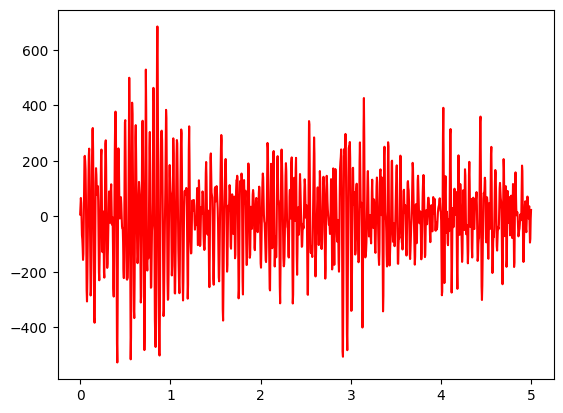

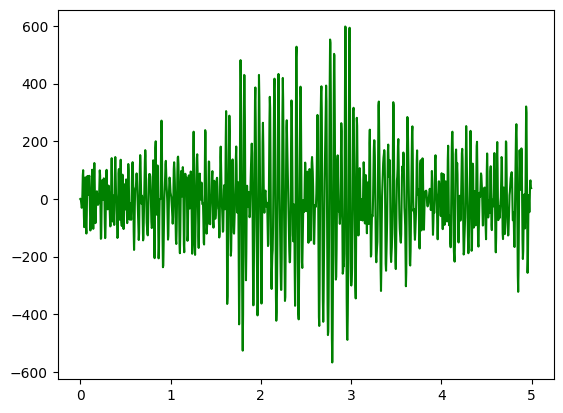

Time in minutes: 68.04166666666667
Time in minutes: 68.08333333333333
Time in minutes: 68.125
Time in minutes: 68.16666666666667
Time in minutes: 68.20833333333333
Time in minutes: 68.25
Time in minutes: 68.29166666666667
Time in minutes: 68.33333333333333
Time in minutes: 68.375
Time in minutes: 68.41666666666667
Time in minutes: 68.45833333333333
Time in minutes: 68.5
Time in minutes: 68.54166666666667
Time in minutes: 68.58333333333333
Time in minutes: 68.625
Time in minutes: 68.66666666666667
Time in minutes: 68.70833333333333
Time in minutes: 68.75
Time in minutes: 68.79166666666667
Time in minutes: 68.83333333333333
Time in minutes: 68.875
Time in minutes: 68.91666666666667
Time in minutes: 68.95833333333333
Time in minutes: 69.0
Time in minutes: 69.04166666666667
Time in minutes: 69.08333333333333
Time in minutes: 69.125
Time in minutes: 69.16666666666667
Time in minutes: 69.20833333333333
Time in minutes: 69.25
Maxima of CC: 0.3229664393866092 0.2721243668358354 0.2585195285847

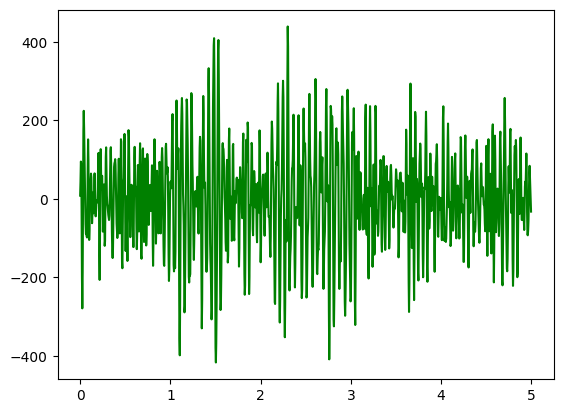

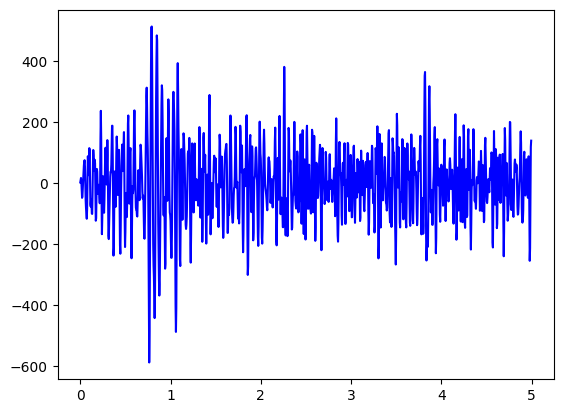

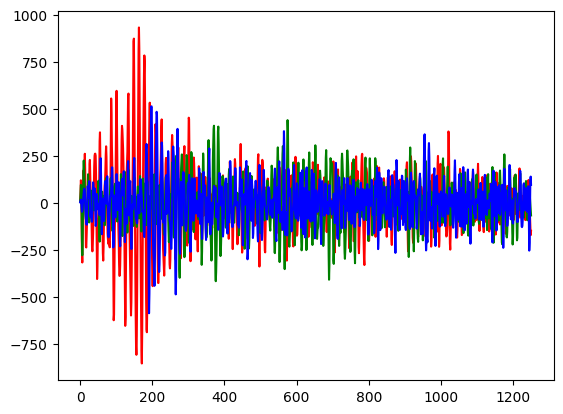

Time in minutes: 81.875
Time in minutes: 81.91666666666667
Time in minutes: 81.95833333333333
Time in minutes: 82.0
Time in minutes: 82.04166666666667
Time in minutes: 82.08333333333333
Maxima of CC: 0.2989931120099246 0.3153499320587723 0.2475856038823507
Time in minutes: 82.125
Time in minutes: 82.16666666666667
Time in minutes: 82.20833333333333
Time in minutes: 82.25
Time in minutes: 82.29166666666667
Time in minutes: 82.33333333333333
Time in minutes: 82.375
Time in minutes: 82.41666666666667
Time in minutes: 82.45833333333333
Time in minutes: 82.5
Time in minutes: 82.54166666666667
Maxima of CC: 0.2623142021726772 0.300142189089234 0.2149509229335398
Time in minutes: 82.58333333333333
Time in minutes: 82.625
Time in minutes: 82.66666666666667
Time in minutes: 82.70833333333333
Time in minutes: 82.75
Time in minutes: 82.79166666666667
Time in minutes: 82.83333333333333
Time in minutes: 82.875
Time in minutes: 82.91666666666667
Time in minutes: 82.95833333333333
Time in minutes: 83

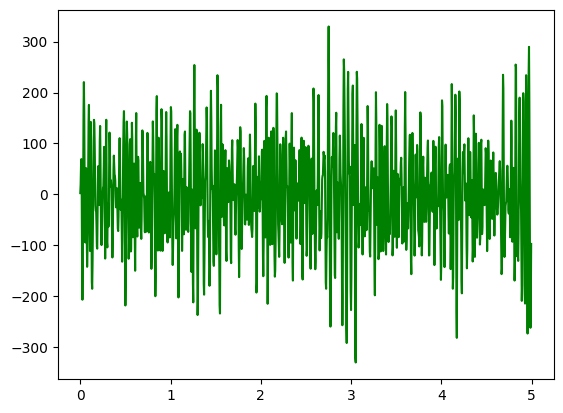

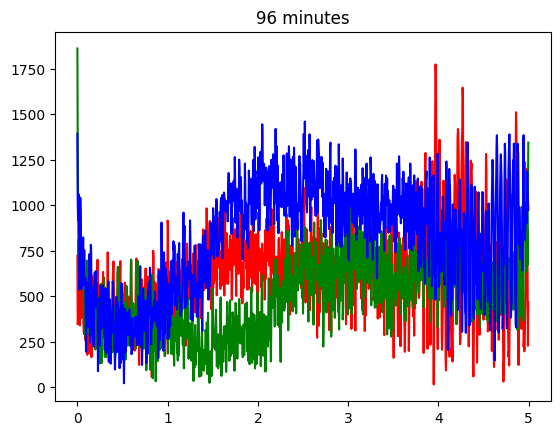

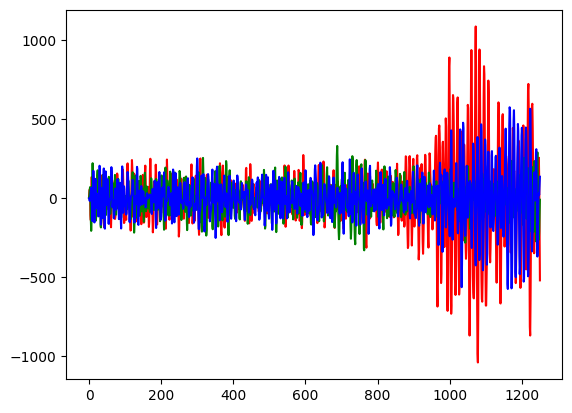

Time in minutes: 96.58333333333333
Maxima of CC: 0.3299539771053192 0.31403158676892284 0.2714851588864245
Time in minutes: 96.625
Time in minutes: 96.66666666666667
Time in minutes: 96.70833333333333
Time in minutes: 96.75
Time in minutes: 96.79166666666667
Time in minutes: 96.83333333333333
Time in minutes: 96.875
Time in minutes: 96.91666666666667
Maxima of CC: 0.30416232017847283 0.265816288520649 0.279562539402152
Time in minutes: 96.95833333333333
Time in minutes: 97.0
Time in minutes: 97.04166666666667
Time in minutes: 97.08333333333333
Time in minutes: 97.125
Time in minutes: 97.16666666666667
Time in minutes: 97.20833333333333
Maxima of CC: 0.2871164801893638 0.3891211244949164 0.30085698865675004
Time in minutes: 97.25
Maxima of CC: 0.2816787233404423 0.3424433505749347 0.29600898532968634
Time in minutes: 97.29166666666667
Time in minutes: 97.33333333333333
Maxima of CC: 0.22895978191128338 0.18553882388092652 0.3571340738862018
Time in minutes: 97.375
Time in minutes: 97.41

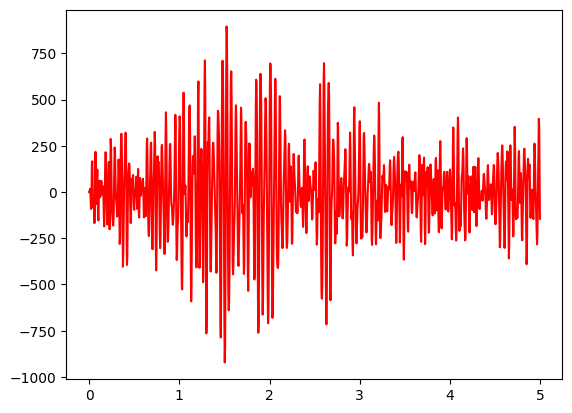

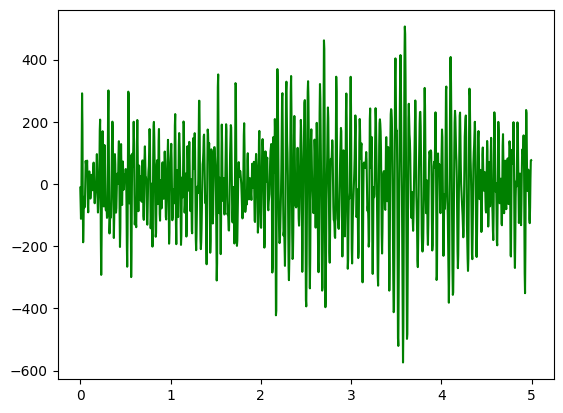

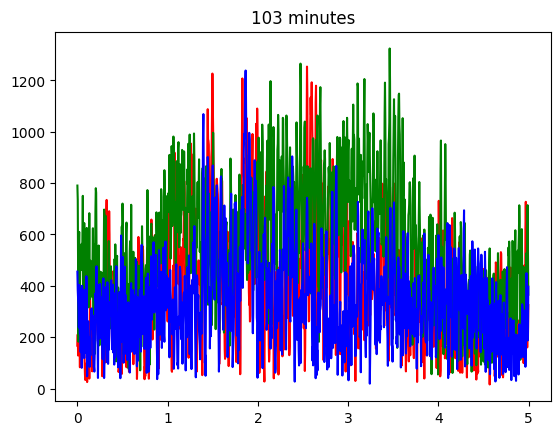

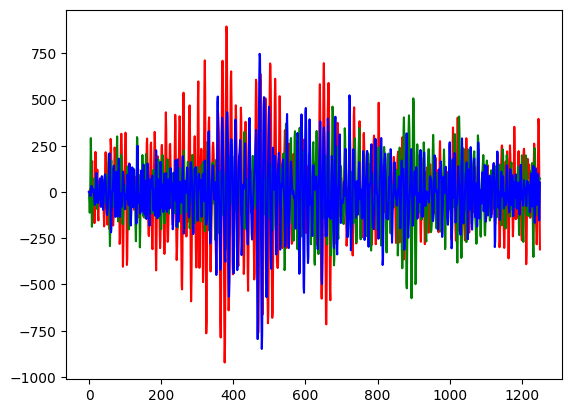

Time in minutes: 103.75
Time in minutes: 103.79166666666667
Time in minutes: 103.83333333333333
Time in minutes: 103.875
Time in minutes: 103.91666666666667
Time in minutes: 103.95833333333333
Time in minutes: 104.0
Time in minutes: 104.04166666666667
Maxima of CC: 0.27557133558700175 0.35108685530734973 0.2109684848093404
Time in minutes: 104.08333333333333
Maxima of CC: 0.27626568011076197 0.3623841618877625 0.2425681641147499
Time in minutes: 104.125
Time in minutes: 104.16666666666667
Time in minutes: 104.20833333333333
Time in minutes: 104.25
Time in minutes: 104.29166666666667
Time in minutes: 104.33333333333333
Maxima of CC: 0.2237084299475275 0.3697873175120759 0.23708752120827203
Time in minutes: 104.375
Maxima of CC: 0.2423489997585553 0.355752304090349 0.33694631587921864
Time in minutes: 104.41666666666667
Time in minutes: 104.45833333333333
Time in minutes: 104.5
Time in minutes: 104.54166666666667
Time in minutes: 104.58333333333333
Time in minutes: 104.625
Time in minute

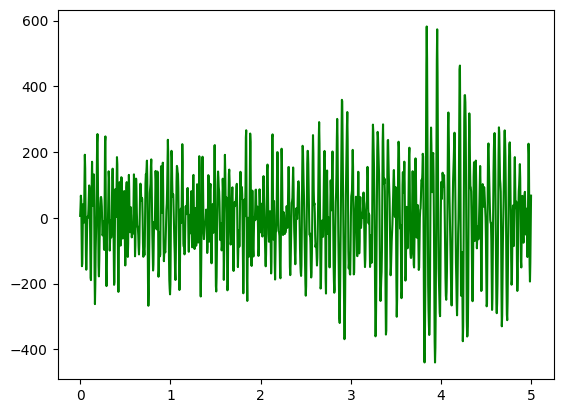

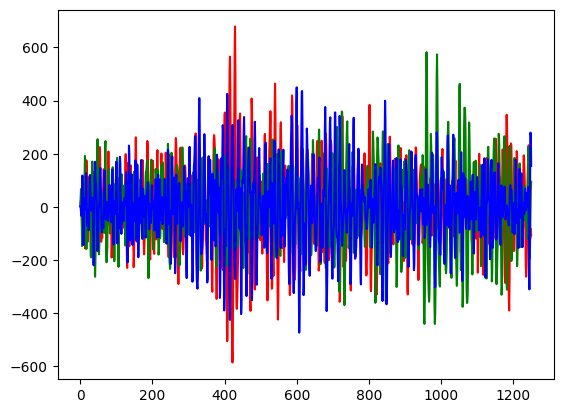

Time in minutes: 113.875
Time in minutes: 113.91666666666667
Time in minutes: 113.95833333333333
Time in minutes: 114.0
Time in minutes: 114.04166666666667
Time in minutes: 114.08333333333333
Time in minutes: 114.125
Maxima of CC: 0.3888058911217725 0.25880022352257415 0.30220701952899576
Time in minutes: 114.16666666666667
Time in minutes: 114.20833333333333
Time in minutes: 114.25
Time in minutes: 114.29166666666667
Time in minutes: 114.33333333333333
Time in minutes: 114.375
Time in minutes: 114.41666666666667
Time in minutes: 114.45833333333333
Time in minutes: 114.5
Time in minutes: 114.54166666666667
Time in minutes: 114.58333333333333
Time in minutes: 114.625
Time in minutes: 114.66666666666667
Time in minutes: 114.70833333333333
Time in minutes: 114.75
Maxima of CC: 0.22804210831067945 0.17756844620937817 0.3083878194443016
Time in minutes: 114.79166666666667
Time in minutes: 114.83333333333333
Time in minutes: 114.875
Time in minutes: 114.91666666666667
Time in minutes: 114.95

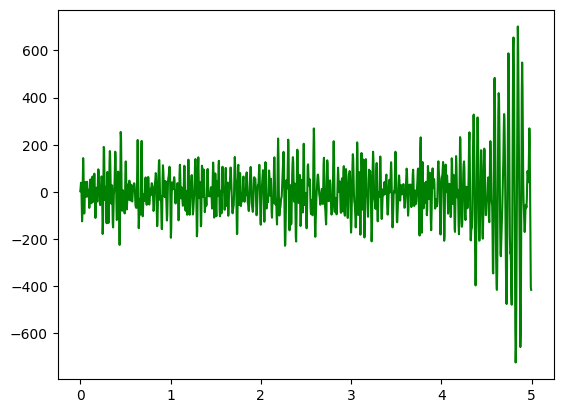

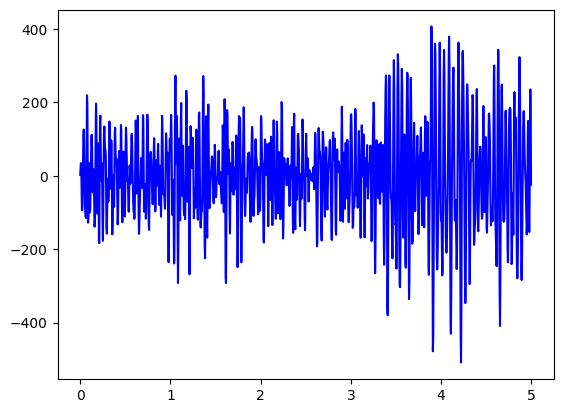

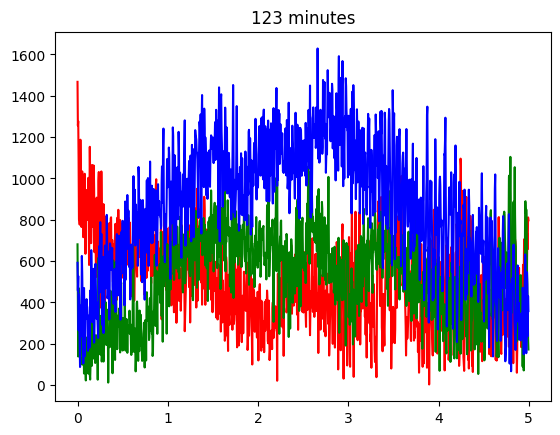

Time in minutes: 123.5
Time in minutes: 123.54166666666667
Time in minutes: 123.58333333333333
Time in minutes: 123.625
Time in minutes: 123.66666666666667
Time in minutes: 123.70833333333333
Time in minutes: 123.75
Time in minutes: 123.79166666666667
Time in minutes: 123.83333333333333
Maxima of CC: 0.3277844458705891 0.2271611560491165 0.24605503178571683
Time in minutes: 123.875
Time in minutes: 123.91666666666667
Time in minutes: 123.95833333333333
Time in minutes: 124.0
Time in minutes: 124.04166666666667
Time in minutes: 124.08333333333333
Time in minutes: 124.125
Time in minutes: 124.16666666666667
Time in minutes: 124.20833333333333
Time in minutes: 124.25
Time in minutes: 124.29166666666667
Time in minutes: 124.33333333333333
Time in minutes: 124.375
Time in minutes: 124.41666666666667
Time in minutes: 124.45833333333333
Time in minutes: 124.5
Time in minutes: 124.54166666666667
Maxima of CC: 0.3526075290932894 0.2629241446767604 0.27347925795642486
Time in minutes: 124.583333

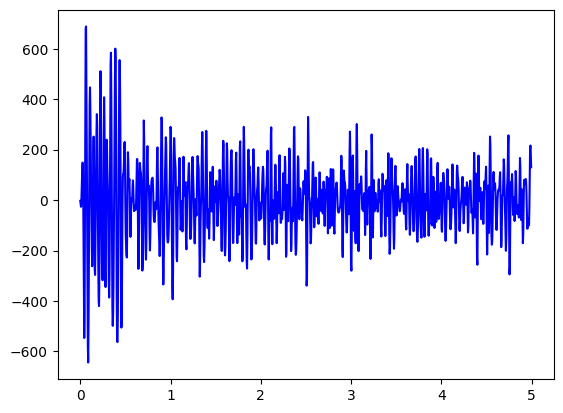

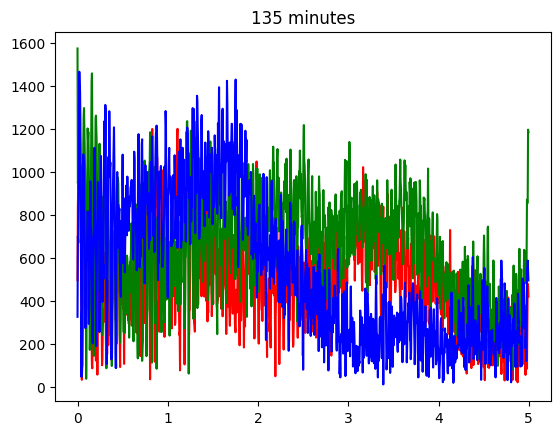

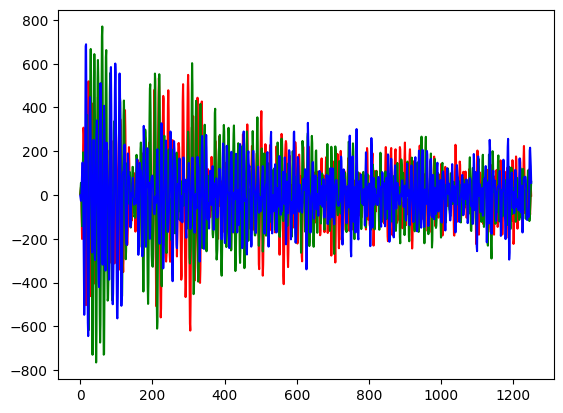

Time in minutes: 135.41666666666666
Time in minutes: 135.45833333333334
Time in minutes: 135.5
Time in minutes: 135.54166666666666
Time in minutes: 135.58333333333334
Time in minutes: 135.625
Time in minutes: 135.66666666666666
Time in minutes: 135.70833333333334
Maxima of CC: 0.3172161622352114 0.24118010561953454 0.24852816832516933
Time in minutes: 135.75
Time in minutes: 135.79166666666666
Time in minutes: 135.83333333333334
Time in minutes: 135.875
Time in minutes: 135.91666666666666
Time in minutes: 135.95833333333334
Maxima of CC: 0.36643292998007443 0.32048037051475525 0.3477138284580642
Time in minutes: 136.0
Maxima of CC: 0.31005951086140104 0.2933835026388199 0.3027969111126358
Time in minutes: 136.04166666666666
Time in minutes: 136.08333333333334
Time in minutes: 136.125
Time in minutes: 136.16666666666666
Time in minutes: 136.20833333333334
Time in minutes: 136.25
Time in minutes: 136.29166666666666
Time in minutes: 136.33333333333334
Maxima of CC: 0.267678828240678 0.322

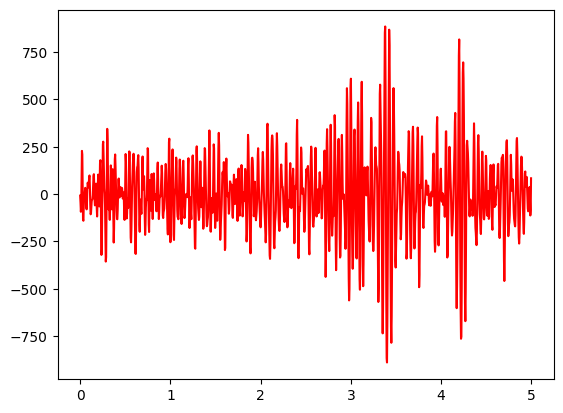

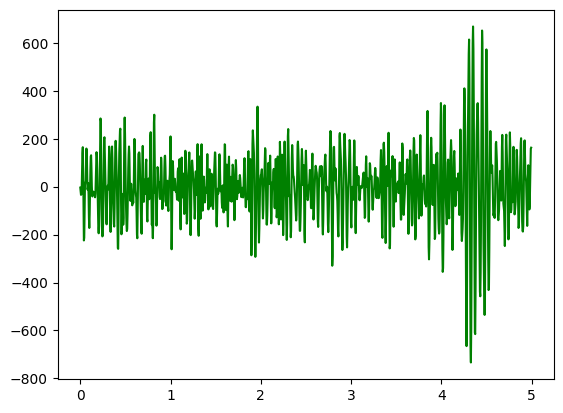

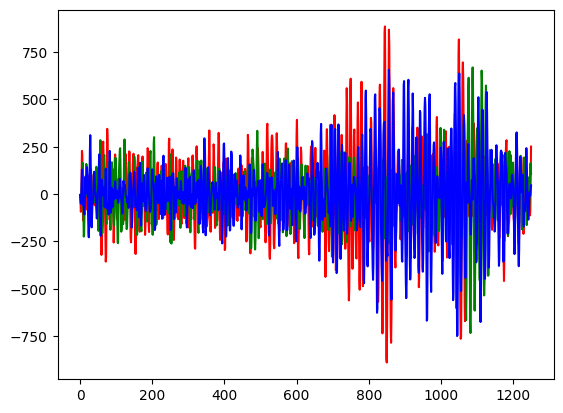

Time in minutes: 142.95833333333334
Maxima of CC: 0.2801667563169161 0.3869528931679522 0.2916511828422635
Time in minutes: 143.0
Time in minutes: 143.04166666666666
Time in minutes: 143.08333333333334
Time in minutes: 143.125
Time in minutes: 143.16666666666666
Time in minutes: 143.20833333333334
Time in minutes: 143.25
Time in minutes: 143.29166666666666
Maxima of CC: 0.20654060877692584 0.32663993169578553 0.277187691670043
Time in minutes: 143.33333333333334
Maxima of CC: 0.2676807630685968 0.3107824250384867 0.26267057258683296
Time in minutes: 143.375
Time in minutes: 143.41666666666666
Time in minutes: 143.45833333333334
Time in minutes: 143.5
Time in minutes: 143.54166666666666
Time in minutes: 143.58333333333334
Maxima of CC: 0.3880382918730601 0.3336457203679644 0.2926678893210653
Time in minutes: 143.625
Maxima of CC: 0.3291923200784548 0.31360998465312406 0.297614027548429
Time in minutes: 143.66666666666666
Time in minutes: 143.70833333333334
Time in minutes: 143.75
Time i

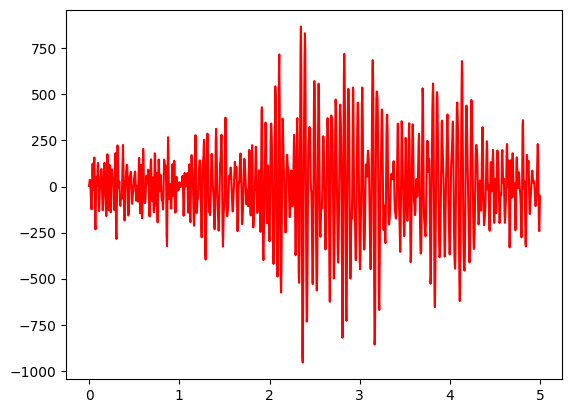

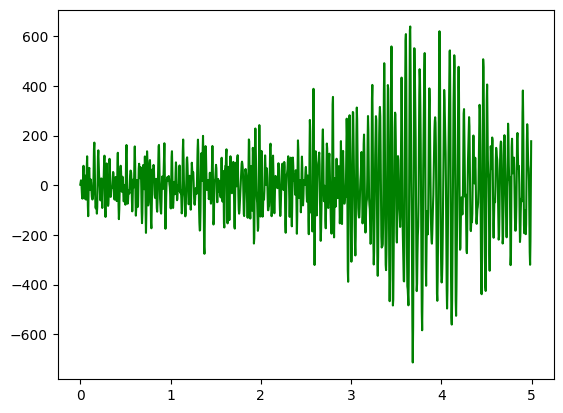

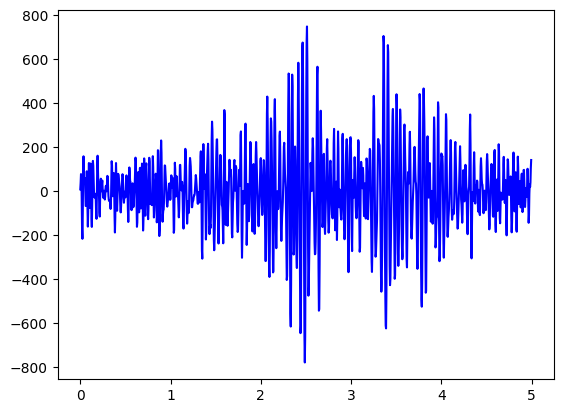

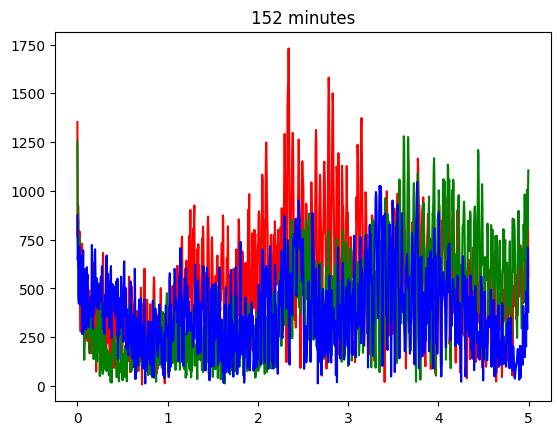

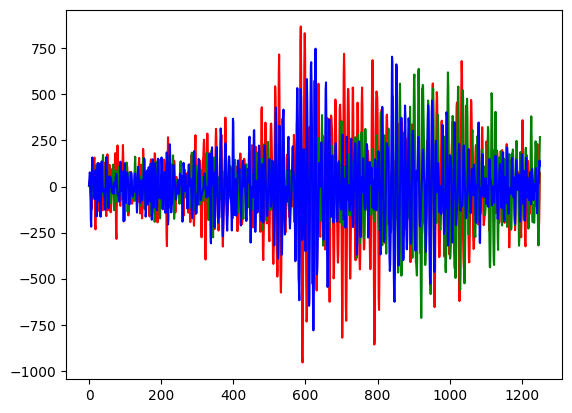

Time in minutes: 152.625
Time in minutes: 152.66666666666666
Time in minutes: 152.70833333333334
Time in minutes: 152.75
Time in minutes: 152.79166666666666
Time in minutes: 152.83333333333334
Time in minutes: 152.875
Time in minutes: 152.91666666666666
Time in minutes: 152.95833333333334
Time in minutes: 153.0
Time in minutes: 153.04166666666666
Time in minutes: 153.08333333333334
Time in minutes: 153.125
Time in minutes: 153.16666666666666
Time in minutes: 153.20833333333334
Time in minutes: 153.25
Maxima of CC: 0.3265161687493948 0.22115060306873377 0.2187953331140219
Time in minutes: 153.29166666666666
Maxima of CC: 0.34651356777751285 0.22394712014150953 0.26023927069420105
Time in minutes: 153.33333333333334
Time in minutes: 153.375
Time in minutes: 153.41666666666666
Time in minutes: 153.45833333333334
Time in minutes: 153.5
Time in minutes: 153.54166666666666
Time in minutes: 153.58333333333334
Maxima of CC: 0.39237716346008816 0.431551469645923 0.31622630791399675
Time in minu

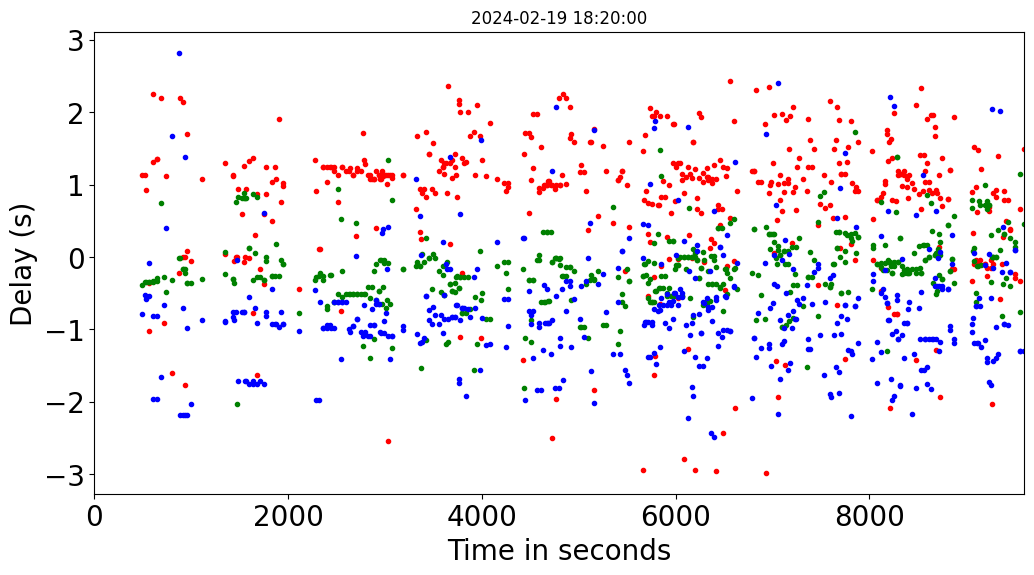

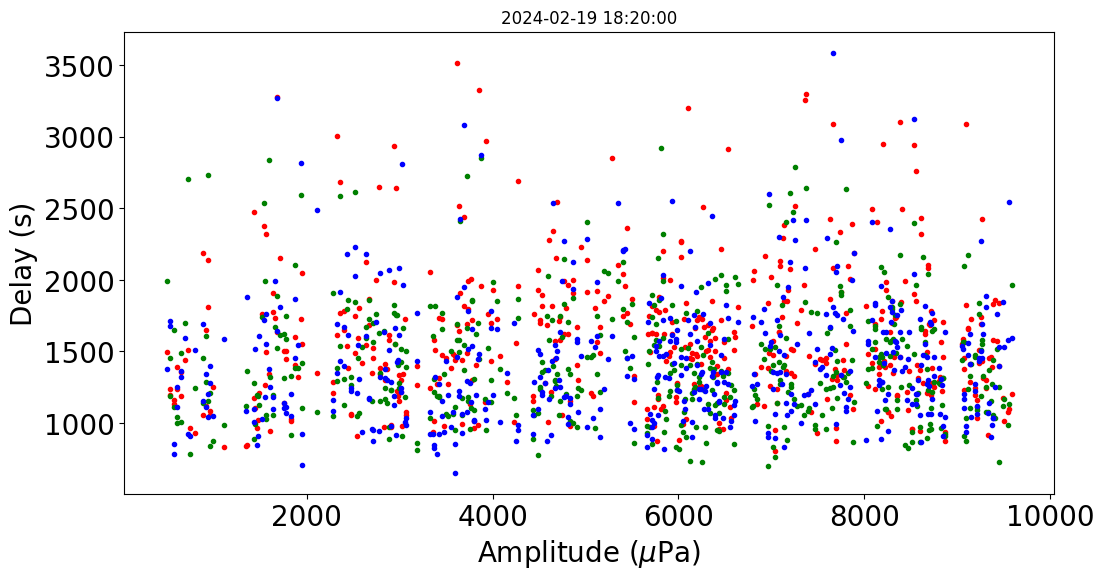

Mean: -0.07898425196850395 Std: 0.8064979068588757


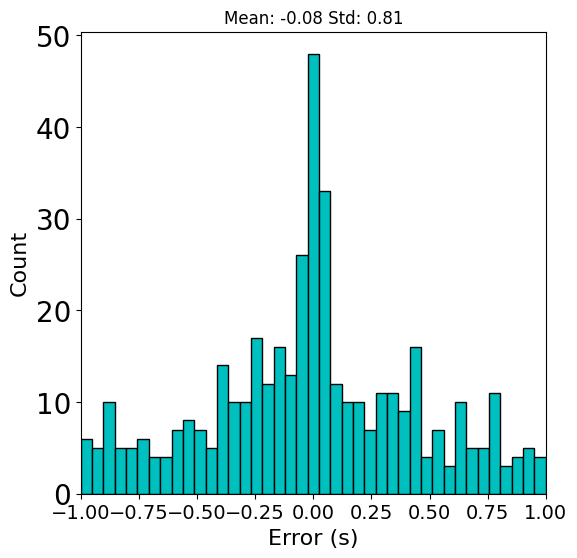

In [ ]:
#
# Read from disk and process the waveforms regardless of picks
#
#
# Read waveform segments dT seconds at the time
#
mincor=0.3
dT = 5
ndT = dT*250+1
tseg=np.empty(ndT)
nt=0
while nt<ndT:
  tseg[nt] = nt/250.
  nt+=1
plotdelay="delays_"+timestring+"_"+str(Interval)+".png"
plotamp="amps_"+timestring+"_"+str(Interval)+".png"
plotdistance="dist_"+timestring+"_"+str(Interval)+".png"
plotdistance_cor="cor_dist_"+timestring+"_"+str(Interval)+".png"
#
# Get epoch time from UTCDateTime
# Get two hours of data
#
delay12 = np.empty(0)
delay31 = np.empty(0)
delay23 = np.empty(0)
a1 = np.empty(0)
a2 = np.empty(0)
a3 = np.empty(0)
times = np.empty(0)
maxcor12 = np.empty(0)
maxcor31 = np.empty(0)
tpoints = np.empty(0)
#
#
#
mseedfileS2="H11S2_"+timestring+"_"+str(Interval)+".mseed"
mseedfileS3="H11S3_"+timestring+"_"+str(Interval)+".mseed"
mseedfileS1="H11S1_"+timestring+"_"+str(Interval)+".mseed"
sectionfile1="section1_H11S1_"+timestring+"_"+str(Interval)+".png"
sectionfile2="section2_H11S1_"+timestring+"_"+str(Interval)+".png"
sectionfile3="section3_H11S1_"+timestring+"_"+str(Interval)+".png"
st2 = read(path+mseedfileS2)
st3 = read(path+mseedfileS3)
st1 = read(path+mseedfileS1)
st2seg=st2
st3seg=st3
st1seg=st1
#
dt = st2[0].stats.sampling_rate
nseg = len(st2[0].data)/dT/dt
print('sampling rate and segments',dt, nseg)
k=0
n10=0
while k < 2*nseg-2:
  startseg = starttime+float(k/2*dT)
  endseg = startseg+dT
  midtime = (k*dT+dT)/2.
  print("Time in minutes:", midtime/60)
  w2 = flt.bandpass(st2seg.slice(startseg,endseg).detrend(type='linear')[0].data, 15, 50, dt)
  w3 = flt.bandpass(st3seg.slice(startseg,endseg).detrend(type='linear')[0].data, 15, 50, dt)
  w1 = flt.bandpass(st1seg.slice(startseg,endseg).detrend(type='linear')[0].data, 15, 50, dt)
#
  cross12=cc.correlate(w2,w1, shift=750, demean=True,
                       normalize='naive', method='auto')
  cross31=cc.correlate(w1,w3, shift=750, demean=True,
                       normalize='naive', method='auto')
  cross23=cc.correlate(w3,w2, shift=750, demean=True,
                       normalize='naive', method='auto')
  (shift12,max12)=cc.xcorr_max(cross12,abs_max=False)
  (shift31,max31)=cc.xcorr_max(cross31,abs_max=False)
  (shift23,max23)=cc.xcorr_max(cross23,abs_max=False)
#
  if (max12 > mincor or max31 > mincor or max23 > mincor):
    print("Maxima of CC:", max12, max31, max23)
    delay12=np.append(delay12,shift12/dt)
    delay31=np.append(delay31,shift31/dt)
    delay23=np.append(delay23,shift23/dt)
    times =np.append(times, midtime)

  #
    senv1=flt.envelope(st1seg.slice(startseg,endseg).detrend(type='linear')[0].data)
    senv2=flt.envelope(st2seg.slice(startseg,endseg).detrend(type='linear')[0].data)
    senv3=flt.envelope(st3seg.slice(startseg,endseg).detrend(type='linear')[0].data)
  #
    outa1=np.append(a1,senv1.max())
    outa2=np.append(a2,senv2.max())
    outa3=np.append(a3,senv3.max())
  #
    a1 = outa1
    a2 = outa2
    a3 = outa3
  #
    n10+=1
    if n10 == 40:
      print(ndT)
#      plt.plot(tseg[0:ndT-1], st1seg.slice(startseg,endseg)[0].data[0:ndT-1],'r-')
      plt.plot(tseg[0:ndT-1], w1[0:ndT-1] ,'r-')
      plt.show()
      plt.plot(tseg[0:ndT-1], w2[0:ndT-1] ,'g-')
      plt.show()
      plt.plot(tseg[0:ndT-1], w3[0:ndT-1] ,'b-')
      plt.show()
      plt.plot(tseg[0:ndT-1],senv1[0:ndT-1],'r-',tseg[0:ndT-1],senv2[0:ndT-1],'g-',
                tseg[0:ndT-1],senv3[0:ndT-1],'b-')
      pstr="{num} minutes".format(num=int(midtime/60))
      plt.title(pstr)
      plt.show()
      plt.plot(w1,'r-',w2,'g-',w3,'b-')
      plt.show()
      n10=0
  k+=1
  #
#
#
fig, ax = plt.subplots(1, 1, figsize=(12, 6),  )
plt.plot(times,delay12,'r.',times,delay31,'g.',times,delay23,'b.')
plt.savefig(plotdelay,format='png')
plt.xlim([0,Interval])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title(timestring)
plt.xlabel('Time in seconds',fontsize=20)
plt.ylabel('Delay (s)',fontsize=20)
plt.show()
fig, ax = plt.subplots(1, 1, figsize=(12, 6),  )
plt.plot(times,a1,'r.',times,a2,'g.',times,a3,'b.')
plt.savefig(plotamp,format='png')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title(timestring)
plt.xlabel('Amplitude ($\u03BC$Pa)',fontsize=20)
plt.ylabel('Delay (s)',fontsize=20)
plt.show()
fig, ax = plt.subplots(1, 1, figsize=(6, 6),  )
lims = np.linspace(-1, 1, 42)
plt.hist(delay23+delay31+delay12, bins = lims, color='c', edgecolor = 'black')
plt.xticks(fontsize=14)
plt.yticks(fontsize=20)
plt.xlim([-1, 1])
plt.xlabel('Error (s)',fontsize=16)
plt.ylabel('Count',fontsize=16)
meanstd="Mean: {mean}".format(mean=round(np.mean(delay23+delay31+delay12),2))
meanstd=meanstd+" Std: {std}".format(std=round(np.std(delay23+delay31+delay12),2))
print("Mean:",np.mean(delay23+delay31+delay12),"Std:",np.std(delay23+delay31+delay12))
plt.title(meanstd)
plt.show()

np.save(path+"delay12"+"_"+timestring+"_"+str(Interval),delay12)
np.save(path+"delay31"+"_"+timestring+"_"+str(Interval),delay31)
np.save(path+"delay23"+"_"+timestring+"_"+str(Interval),delay23)
np.save(path+"times"+"_"+timestring+"_"+str(Interval),times)
np.save(path+"amp1"+"_"+timestring+"_"+str(Interval),a1)
np.save(path+"amp2"+"_"+timestring+"_"+str(Interval),a2)
np.save(path+"amp3"+"_"+timestring+"_"+str(Interval),a3)
#


[link text](https://)